# Movie Recommendation System

© Explore Data Science Academy

---
### Honour Code

I {**2307FTDS_team_NM3 Members**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Twitter Sentiment Classification

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

2307FTDS_team_NM3 Members:
 1.
 2.
 3.
 4.
 5. Christelle Coetzee
 6.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Feature Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a href=#nine>9. Conclusion</a>

 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Introduction ⚡ |
| :--------------------------- |
| In this section, we will introduce our institution and provide our problem statement. |

<a id="two"></a>
## 2. Import Packages and Libaries
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: package importation⚡ |
| :--------------------------- |
| In this section we will import all the packages we will need in order to run our notebook. |

---

In [1]:
# Installations:

# Uncomment and run the following commands to install necessary libraries:

# Install Comet ML for experiment tracking
#!pip install comet_ml

# Install WordCloud for generating word clouds
#!pip install wordcloud

# Install Contractions for handling contractions in text data
#!pip install contractions

# Install CatBoost for CatBoost Classifier
#!pip install catboost

# Install XGBoost for XGBoost Classifier
#!pip install xgboost

# Install MLxtend for additional machine learning utilities
#!pip install mlxtend

# Install or upgrade TensorFlow for neural network models
#!pip install --upgrade tensorflow

# Install currencyconverter for the budget section
#!pip install currencyconverter

In [2]:
# Import necessary libraries
import numpy as np  # Numerical operations library
import pandas as pd  # Data manipulation and analysis library
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Data visualization library based on Matplotlib
%matplotlib inline
from wordcloud import WordCloud  # Word cloud generation library
import sqlite3 # Create new databases based on the originals
%load_ext sql

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import Comet ML for experiment tracking
from comet_ml import Experiment  # Experiment tracking library

# Import Natural Language Toolkit (nltk) for text processing
import nltk  # Natural Language Toolkit
from nltk.corpus import stopwords  # Stopwords for text processing
from nltk.stem import WordNetLemmatizer  # Lemmatization for text processing
from nltk.tokenize import word_tokenize, TreebankWordTokenizer  # Tokenization for text processing
nltk.download('punkt')
nltk.download('wordnet')
import unicodedata  # Unicode character normalization
import contractions  # Expansion of contractions in text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # Text vectorization libraries

# Import regular expressions and string manipulation module
import re  # Regular expressions
import string  # String manipulation
import itertools  # Iteration tools
from collections import Counter  # Collection data type

# Libraries for data preparation and model building
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix  # Classification metrics
from sklearn.model_selection import train_test_split, GridSearchCV  # Train-test split and grid search
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier for machine learning
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier for machine learning
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier for machine learning
from sklearn.svm import LinearSVC, SVC  # Support Vector Machine classifiers
from sklearn.naive_bayes import GaussianNB, MultinomialNB  # Naive Bayes classifiers
from sklearn.ensemble import BaggingClassifier  # Bagging classifier
from sklearn.ensemble import ExtraTreesClassifier  # Extra Trees classifier
from sklearn.ensemble import VotingClassifier  # Voting classifier
from xgboost import XGBClassifier  # Efficient and flexible gradient boosting library
from catboost import CatBoostClassifier  # High-performance gradient boosting on decision trees library
from scipy.sparse import hstack  # Used for stacking sparse matrices horizontally
import pickle  # Serialization library
from sklearn.utils import resample  # Resampling tool
from sklearn import feature_selection  # Feature selection module
from sklearn.feature_selection import f_classif  # Feature selection using F-statistic
from mlxtend.feature_selection import SequentialFeatureSelector  # Sequential feature selection
from sklearn import preprocessing  # Data preprocessing
import pickle  # Serialization library
import tensorflow as tf  # TensorFlow for neural net
from tensorflow.keras.layers import Dense  # Dense layer in Keras
from tensorflow.keras.models import Sequential  # Sequential model in Keras
from tensorflow.keras.utils import to_categorical  # Conversion to categorical data
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, preprocessing)
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Utility Libraries
from currency_converter import CurrencyConverter # Used to convert budget to standard currency
import sys # Used for memory management
import gc # Used for memory management

# Feature selection Libraries:
from sklearn.feature_selection import SelectKBest  # To reduce features
from sklearn.feature_selection import chi2  # Used to estimate which features are most impactful

# Global Constants for reproducibility and consistency
TRAIN_TEST_SPLIT_VAR = 0.2  # Ratio for train-test split
RAND_STATE = 42  # Random seed for reproducibility
MAX_TEXT_FEATURES = 5000  # Maximum number of text features for all algorithms with exceptions listed below
RAD_SVC_Text_Features = 1000  # Specifically for use in radial SVC
NN_Text_Features = 1000  # Specifically for use in neural net
XGB_Text_Features = 1000  # Specifically for use in XGBoost algorithm
EXTRA_Text_Features = 1000  # Specifically for use in Extra Trees algorithm
BAG_Text_Features = 1000  # Specifically for use in Bagging algorithm
CONTENT_VEC_MIN_WORD_TO_REMOVE = 10  # Remove words that occur less than this value in the dataset
USER_VEC_MIN_WORD_TO_REMOVE = 10  # Remove words that occur less than this value in the dataset

# Flags for notebook Execution
COMET_FLAG = False  # To gauge whether to commit experiments to Comet ML
VECTORIZER_TO_USE = "tfidf"  # Chooses between TfIDF vectorizer or Count Vectorizer - accepted values are "tfidf" or "count"

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\T460\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\T460\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<a id="three"></a>
## 3. Loading of Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: data loading ⚡ |
| :--------------------------- |
| In this section, we will load our datasets. |

---

Let's begin by loading our data into a DataFrame:

In [3]:
# Read training data from CSV file into a DataFrame
df_genome_scores = pd.read_csv('genome_scores.csv')

df_genome_tags = pd.read_csv('genome_tags.csv')

df_imdb_data = pd.read_csv('imdb_data.csv')

df_links = pd.read_csv('links.csv')

df_movies = pd.read_csv('movies.csv')

df_tags = pd.read_csv('tags.csv')

df_train = pd.read_csv('train.csv')

# Read test from CSV file into a DataFrame
df_test = pd.read_csv('test.csv')

<a id="four"></a>
## 4. Exploratory Data Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: EDA process ⚡ |
| :--------------------------- |
| In this section, we will perform an in-depth analysis of all the variables in the DataFrame. |

### **4.1. Data Overview:**

As we embark on the data overview phase, our objective is to delve into the foundational structure of the dataset. This exploration will encompass an examination of key aspects such as the dataset's shape, columns, and initial content, providing us with a comprehensive understanding of the basic characteristics inherent in our data.

To commence our exploration of the dataset, we initiate a thorough examination of a segment of our data, aiming to identify and analyze the key variables under consideration. This initial step is fundamental to understanding the landscape of our dataset and laying the groundwork for subsequent analyses.

Since we have multiple databases, let's take a closer look at each one and what they encompass.

#### **4.1.1. `df_genome_scores`:**

Let's commence by showcasing our dataset named `df_genome_scores`:

In [4]:
# Display the first few rows of the genome_score dataset
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


This dataset contains information about both movieId and tagId, with the relevance score indicating the degree of relevance between the tag and the movie. The tag genome assesses the strength of each tag's applicability to each item, represented on a continuous scale from 0 to 1. In this scale, 0 signifies no applicability, while 1 indicates a very strong relevance of the tag to the item.

The relevance score is valuable for both content-based and collaborative models. It contributes to the effectiveness of content-based models by quantifying content similarity, and it enhances collaborative models by incorporating content-related features to improve recommendations. The dual impact of relevance scores makes them a valuable component in creating a comprehensive recommendation system that combines both content and collaborative filtering approaches.

In [5]:
# Display the shape (number of rows and columns) of the genome_score dataset
df_genome_scores.shape

(15584448, 3)

The dataset comprises 15,584,448 rows and encompasses 3 columns, indicating its substantial size. Given the vast scale of this dataset, it becomes imperative to explore techniques for dimensionality reduction to efficiently manage and analyze the data.

In [6]:
# Display information about the genome_scores dataset, including data types
df_genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


This database exclusively contains floating-point numbers or integers, making it compatible for constructing models.

In [7]:
# Display the count of missing values in each column of the genome_scores dataset
df_genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

There are no missing values in this dataset. 

#### **4.1.2. `df_genome_tags`:**

Let's commence by showcasing our dataset named `df_genome_tags`:

In [8]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


The dataset `df_genome_tags` furnishes user-assigned tag descriptions corresponding to the tag IDs found in the `df_genome_scores` dataset.

The dataset is more important for the content-based model. It enriches the content representation, enhances interpretability, and contributes to personalized recommendations by incorporating user-generated insights into the content features. This user-generated metadata is particularly valuable when aiming for a recommendation system that reflects both automated content analysis and user perceptions.

In [9]:
df_genome_tags.shape

(1128, 2)

The dataset comprises 1128 rows and encompasses 2 columns.

In [10]:
# Display information about the genome_tags dataset, including data types
df_genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


The dataset includes an integer column (`tagId`) and an object column (`tag`). As models cannot directly process language, the object column needs to undergo encoding before we proceed with training the model.

In [11]:
# Display the count of missing values in each column of the genome_tags dataset
df_genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

There are no missing values in this dataset.

#### **4.1.3. `df_imdb_data`:**

Let's commence by showcasing our dataset named `df_imdb_data`:

In [12]:
df_imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


This dataset incorporates supplementary movie metadata extracted from IMDB, utilizing the information provided in the `df_links` dataset links. It encompasses details such as the cast, director, runtime, budget, and plot keywords associated with a specific movie, identified by the `movieId`.

 The dataset is more important for the content-based model. It significantly enhances the content representation, contributes to content similarity assessments, supports personalization, and ultimately improves the quality of recommendations based on the content characteristics of movies. This additional metadata is valuable in creating a content-based recommendation system that takes into account both automated content analysis and user-specific preferences.

In [13]:
df_imdb_data.shape

(27278, 6)

The dataset comprises 27,278 rows and encompasses 6 columns.

In [14]:
# Display information about the imdb_data dataset, including data types
df_imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


The dataset comprises four object columns that necessitate encoding. Additionally, there is observable presence of missing values within the dataset.

In [15]:
# Display the count of missing values in each column of the imdb_data dataset
df_imdb_data.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

This dataset exhibits a considerable number of missing values. Specifically, there are 10,068 missing values in the `title_cast` column, 9,874 in the `director` column, 12,089 in the `runtime` column, 19,372 in the `budget` column, and 11,078 in the `plot_keywords` column.

Lastly, we will examine the summary statistics for the movie runtimes.

In [16]:
# Check summary statistics of runtime
print(df_imdb_data['runtime'].describe())

count    15189.000000
mean       100.312331
std         31.061707
min          1.000000
25%         89.000000
50%         98.000000
75%        109.000000
max        877.000000
Name: runtime, dtype: float64


The mean runtime is approximately 100 minutes.

#### **4.1.4. `df_links`:**

Let's commence by showcasing our dataset named `df_links`:

In [17]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


This dataset provids a mapping between a Movie ID and associated IMDB and TMDB IDs.

The dataset is more important for the collaborative model. It enables cross-dataset linking, enhances user similarity assessments, and allows collaborative models to leverage information from multiple sources. While it may have some impact on content-based models by providing additional content features, its primary significance lies in facilitating collaborative filtering methods that benefit from a broader range of user preferences and movie details.

In [18]:
df_links.shape

(62423, 3)

The dataset comprises 62,423 rows and encompasses 3 columns.

In [19]:
# Display information about the links dataset, including data types
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


This database exclusively contains floating-point numbers or integers, making it compatible for constructing models.

In [20]:
# Display the count of missing values in each column of the links dataset
df_links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

The column `tmdbId` in this dataset exhibits 107 instances of missing values.

#### **4.1.5. `df_movies`:**

Let's commence by showcasing our dataset named `df_movies`:

In [21]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


The dataset encompasses the movieId, the movie title (including the year of release), and the genres, which are presented as a pipe-separated list. The genres are chosen from the following categories:

Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western
(no genres listed)

The dataset is important for both content-based and collaborative models, but its impact is more pronounced in content-based recommendation systems. Genres play a central role in content representation, content similarity assessments, and providing personalized recommendations based on users' genre preferences. However, collaborative models also benefit from the genre information to enhance user similarity and diversify recommendations within user clusters. The dataset's contribution to content-based models is more direct and prominent due to its role in content representation and similarity assessments.

In [22]:
df_movies.shape

(62423, 3)

The dataset comprises 62,423 rows and encompasses 3 columns.

In [23]:
# Display information about the movies dataset, including data types
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


The dataset comprises two object columns that necessitate encoding.

In [24]:
# Display the count of missing values in each column of the movies dataset
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

There are no missing values.

#### **4.1.6. `df_tags`:**

Let's commence by showcasing our dataset named `df_tags`:

In [25]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In this dataset, both user ID and movie ID are present. Tags, in this context, refer to user-generated metadata pertaining to movies. Each tag is usually a single word or a concise phrase, with its interpretation, significance, and purpose defined by individual users. The timestamps in the dataset represent the seconds elapsed since midnight Coordinated Universal Time (UTC) on January 1, 1970.

The dataset is important for both collaborative and content-based models. Its impact is significant in collaborative models for understanding user preferences, defining user similarity, and diversifying recommendations. In content-based models, the tags contribute to content representation, content similarity, and personalized recommendations. The inclusion of timestamps adds a temporal dimension that can benefit both types of models by capturing temporal dynamics in user interactions.

In [26]:
df_tags.shape

(1093360, 4)

The dataset comprises 1,093 369 rows and encompasses 4 columns, indicating its substantial size. Given the vast scale of this dataset, it becomes imperative to explore techniques for dimensionality reduction to efficiently manage and analyze the data.

In [27]:
# Display information about the tags dataset, including data types
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


There is one object column in this dataset, which also has some missing values.

In [28]:
# Display the count of missing values in each column of the tags dataset
df_tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

The `tag` column has 16 missing values.

#### **4.1.7. `df_train`:**

Let's commence by showcasing our dataset named `df_train`:

In [29]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


This dataset contains both user ID and Movie ID entries. Ratings in this dataset are assigned on a 5-star scale, allowing for half-star increments ranging from 0.5 stars to 5.0 stars. The timestamps in the dataset are represented in seconds since midnight Coordinated Universal Time (UTC) on January 1, 1970.

The dataset is more important for collaborative models, as ratings play a central role in understanding user preferences and making accurate recommendations. The timestamps provide a temporal dimension that enhances the adaptability of collaborative models over time. While less critical for content-based models, timestamps can still be valuable for capturing temporal changes in movie metadata or content features.

In [30]:
df_train.shape

(10000038, 4)

The dataset comprises 10,000,038 rows and encompasses 4 columns, indicating its substantial size. Given the vast scale of this dataset, it becomes imperative to explore techniques for dimensionality reduction to efficiently manage and analyze the data.

In [31]:
# Display information about the train dataset, including data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


This database exclusively contains floating-point numbers or integers, making it compatible for constructing models.

In [32]:
# Display the count of missing values in each column of the train dataset
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

There are no missing values in the dataset.

Now, let's examine the statistical distribution of the `rating` column.

In [33]:
# Statistical breakdown of ratings:
df_train["rating"].describe().round(2)

count    10000038.00
mean            3.53
std             1.06
min             0.50
25%             3.00
50%             3.50
75%             4.00
max             5.00
Name: rating, dtype: float64

The average rating is 3.53.

#### **4.1.7. `df_test`:**

Let's commence by showcasing our dataset named `df_test`:

In [34]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


The test dataset exclusively includes the user ID and the movie ID, providing a simplified structure for testing purposes.

In [35]:
df_test.shape

(5000019, 2)

The dataset comprises 5,000,019 rows and encompasses 2 columns, indicating its substantial size. Given the vast scale of this dataset, it becomes imperative to explore techniques for dimensionality reduction to efficiently manage and analyze the data.

In [36]:
# Display information about the test dataset, including data types
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


This database exclusively contains integers, making it compatible for constructing models.

In [37]:
# Display the count of missing values in each column of the test dataset
df_test.isnull().sum()

userId     0
movieId    0
dtype: int64

There are no missing values.

### **4.2. Exploratory Data Analysis:**

Exploratory data analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

The main purpose of exploratory data analysis (EDA) is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables; in other words it gives more insight of the data.

**EDA can be conducted in the following ways:**

**Univariate**:
- *non-graphical*: This is simplest form of data analysis, where the data being analyzed consists of just one variable. Since it’s a single variable, it doesn’t deal with causes or relationships.<br>
- *graphical*:- Non-graphical methods don’t provide a full picture of the data. Graphical methods are therefore required. It involves visual exploratory analysis of the data.

**Multivariate**:
- *non-graphical*: Multivariate non-graphical EDA techniques generally show the relationship between two or more variables of the data through cross-tabulation or statistics.<br>
- *graphical*: Multivariate data uses graphics to display relationships between two or more sets of data. The most used graphic is a grouped bar plot or bar chart with each group representing one level of one of the variables and each bar within a group representing the levels of the other variable.

Initially, let's generate a separate Exploratory Data Analysis (EDA) dataset specifically for the training data. This allows us to conduct thorough exploratory analysis without directly modifying the original training dataset. Creating a dedicated EDA dataset ensures that any insights or modifications made during the exploration phase do not impact the integrity of the original data, facilitating a more controlled and informative analysis.

In [38]:
# Read training data from CSV file into a DataFrame
eda_genome_scores = pd.read_csv('genome_scores.csv')

eda_genome_tags = pd.read_csv('genome_tags.csv')

eda_imdb_data = pd.read_csv('imdb_data.csv')

eda_links = pd.read_csv('links.csv')

eda_movies = pd.read_csv('movies.csv')

eda_tags = pd.read_csv('tags.csv')

eda_train = pd.read_csv('train.csv')

# Read test from CSV file into a DataFrame
eda_test = pd.read_csv('test.csv')

#### **4.2.1. Tags:**

First of all, let's merge the `eda_genome_scores` dataset with the `eda_genome_tag` dataset to establish the correlation between movie IDs and their associated tags.

In [39]:
# Merge based on the 'tagId' column
eda_merged_genome = pd.merge(eda_genome_scores, eda_genome_tags, on='tagId')

Let's also rename the `tag` column to `genome_tag` to avoid any potential confusion with the `tag` column present in the `eda_tags` dataset.

In [40]:
# Rename the 'tag' column to 'genome_tag'
eda_merged_genome = eda_merged_genome.rename(columns={'tag': 'genome_tag'})

In [41]:
# Display the merged DataFrame
eda_merged_genome

,movieId,tagId,relevance,genome_tag
0,1,1,0.02875,007
1,2,1,0.04125,007
2,3,1,0.04675,007
3,4,1,0.03425,007
4,5,1,0.04300,007
...,...,...,...,...
15584443,205072,1128,0.09100,zombies
15584444,205076,1128,0.02350,zombies
15584445,205383,1128,0.03925,zombies
15584446,205425,1128,0.02850,zombies


Let's examine the word cloud representing the `genome_tag`:

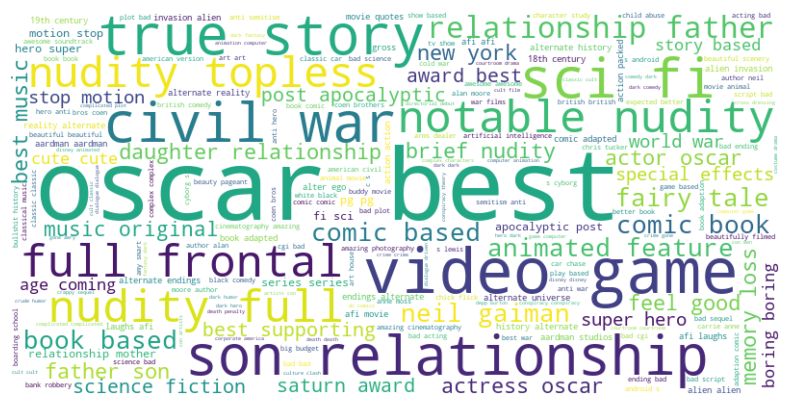

In [42]:
# Combine all genome tags into a single string
text = ' '.join(eda_merged_genome['genome_tag'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Based on the word cloud analysis, prevalent descriptors for movies include terms such as 'oscar best,' 'true story,' 'video game,' 'son relationship,' 'sci-fi,' 'civil war,' and several references to 'nudity.' These recurrent words capture common themes and attributes frequently associated with the movies in the dataset.

To further distinguish the 'tags' columns from each other, we will rename the `tag` column in the `eda_tags` dataset to `user_tag`.

In [43]:
# Rename the 'tag' column to 'user_tag'
eda_tags = eda_tags.rename(columns={'tag': 'user_tag'})

# Display the DataFrame after renaming
eda_tags

,userId,movieId,user_tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
...,...,...,...,...
1093355,162521,66934,Neil Patrick Harris,1427311611
1093356,162521,103341,cornetto trilogy,1427311259
1093357,162534,189169,comedy,1527518175
1093358,162534,189169,disabled,1527518181


Let's examine the word cloud representing the `user_tag`:

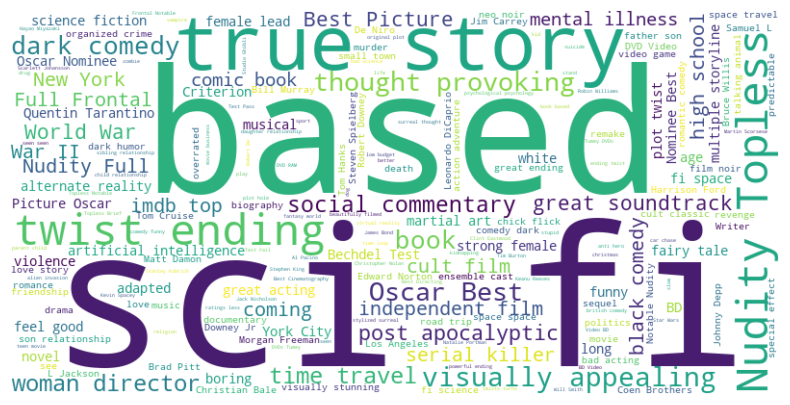

In [44]:
# Combine all tags into a single string
text = ' '.join(eda_tags['user_tag'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The most popular tags assigned to movies include terms such as 'based,' 'sci-fi,' 'true story,' 'twist ending,' and 'Nudity Topless.' These tags represent recurring themes and characteristics commonly associated with the movies in the dataset. In comparison to the most frequent words found in the `genome_tags` column, both sets of descriptors provide insights into the diverse elements and genres prevalent in the movie dataset.

To delve deeper into our investigation, we will establish a connection between the movie titles in the eda_movies dataset and our dataset. Specifically, we will scrutinize a well-known movie that should be familiar to all – 'Toy Story (1995).' This analysis aims to evaluate the relevance and accuracy of the associated tags for this particular movie.

In [45]:
# Save DataFrames to SQLite tables
conn = sqlite3.connect(":memory:")
eda_movies[['movieId', 'title']].to_sql("movies", conn, index=False)
eda_merged_genome[['movieId', 'relevance', 'genome_tag']].to_sql("merged_genome", conn, index=False)
eda_tags[['movieId', 'user_tag']].to_sql("tags", conn, index=False)

# Execute SQL join with filtering for 'Toy Story (1995)'
query = """
SELECT m.movieId, m.title, mg.relevance, mg.genome_tag, t.user_tag
FROM movies m
LEFT JOIN merged_genome mg ON m.movieId = mg.movieId
LEFT JOIN tags t ON m.movieId = t.movieId
WHERE m.title = 'Toy Story (1995)'
"""
all_tags_df = pd.read_sql_query(query, conn)

In [46]:
# Display the final DataFrame
all_tags_df

,movieId,title,relevance,genome_tag,user_tag
0,1,Toy Story (1995),0.00275,hannibal lecter,2009 reissue in Stereoscopic 3-D
1,1,Toy Story (1995),0.00275,hannibal lecter,3D
2,1,Toy Story (1995),0.00275,hannibal lecter,3D
3,1,Toy Story (1995),0.00275,hannibal lecter,3D
4,1,Toy Story (1995),0.00275,hannibal lecter,55 movies every kid should see--Entertainment ...
...,...,...,...,...,...
786211,1,Toy Story (1995),0.99925,toys,witty
786212,1,Toy Story (1995),0.99925,toys,witty
786213,1,Toy Story (1995),0.99925,toys,witty
786214,1,Toy Story (1995),0.99925,toys,ya boy


To visualize the relevance of the tags in relation to 'Toy Story (1995),' we will create two distinct graphs. The first graph will illustrate the top 20 most relevant `genome_tag`s, while the second graph will showcase the bottom 20 least relevant `genome_tag`s. This approach aims to provide a focused examination of tag significance specifically for the movie 'Toy Story (1995).'

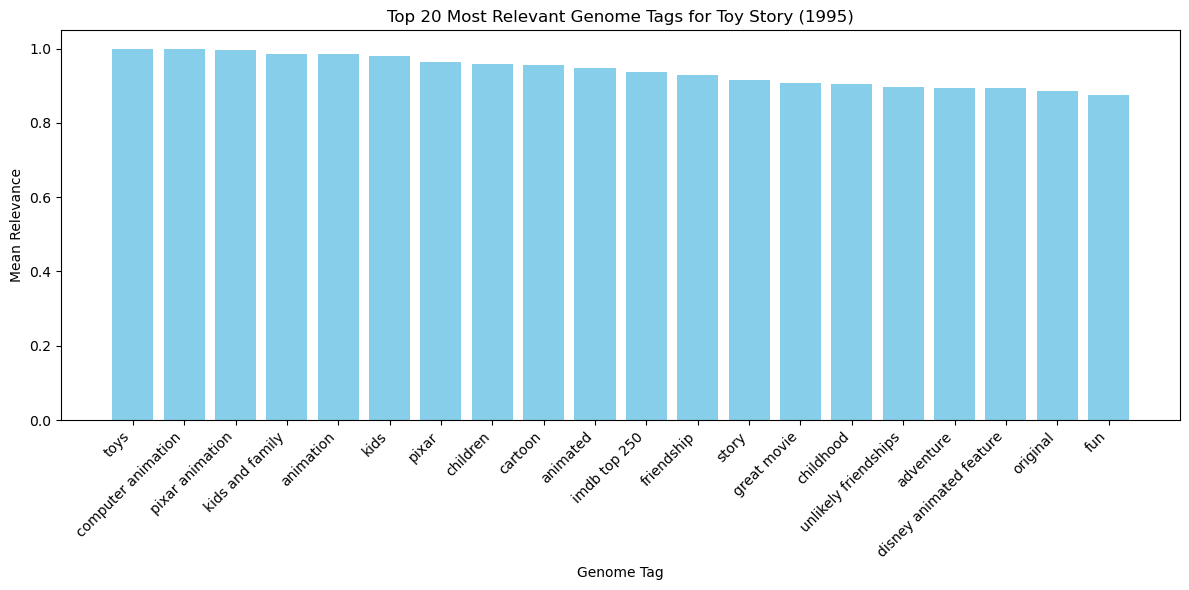

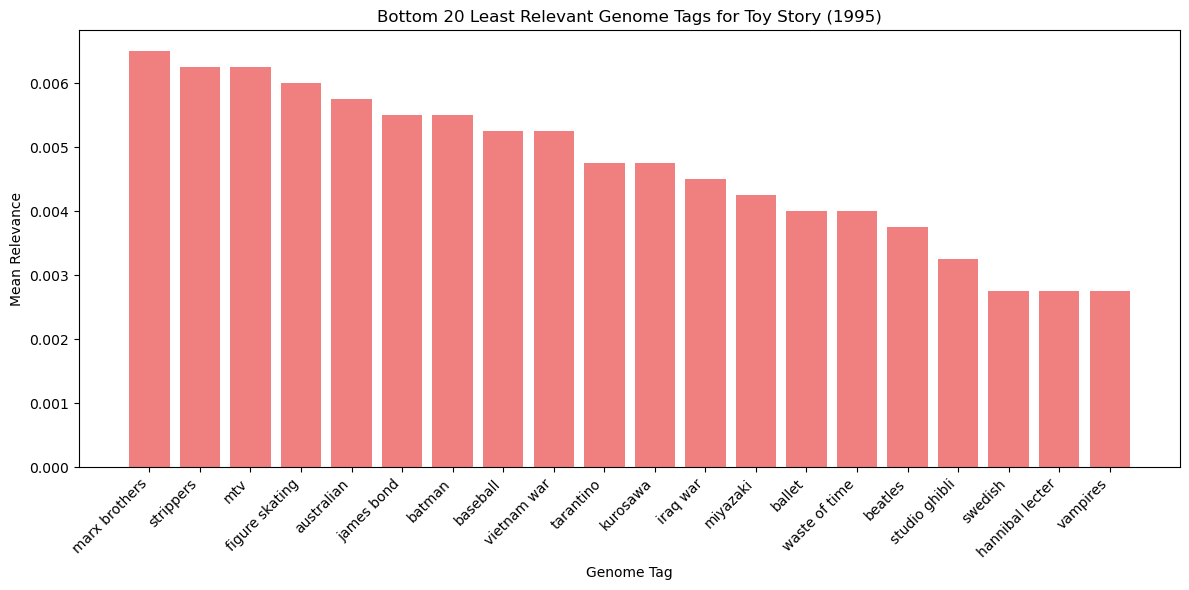

In [47]:
# Group by 'genome_tag' and calculate the mean relevance
grouped_df = all_tags_df.groupby('genome_tag')['relevance'].mean().reset_index()

# Sort by relevance in descending order
sorted_df = grouped_df.sort_values(by='relevance', ascending=False)

# Top 20 most relevant tags
top_20_most_relevant = sorted_df.head(20)

# Bottom 20 least relevant tags
bottom_20_least_relevant = sorted_df.tail(20)

# Plotting top 20 most relevant tags
plt.figure(figsize=(12, 6))
plt.bar(top_20_most_relevant['genome_tag'], top_20_most_relevant['relevance'], color='skyblue')
plt.xlabel('Genome Tag')
plt.ylabel('Mean Relevance')
plt.title('Top 20 Most Relevant Genome Tags for Toy Story (1995)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting bottom 20 least relevant tags
plt.figure(figsize=(12, 6))
plt.bar(bottom_20_least_relevant['genome_tag'], bottom_20_least_relevant['relevance'], color='lightcoral')
plt.xlabel('Genome Tag')
plt.ylabel('Mean Relevance')
plt.title('Bottom 20 Least Relevant Genome Tags for Toy Story (1995)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Upon scrutinizing the results, it appears that the relevance meter is accurate in its assessment. The visualization of both the top 20 most relevant and bottom 20 least relevant `genome_tag`s in connection with 'Toy Story (1995)' provides confidence in the effectiveness of the tagging system.

Furthermore, let's delve into the analysis of the top 20 most occurring `user_tag`s and the bottom 20 least occurring `user_tag`s specifically concerning 'Toy Story (1995).' This exploration aims to provide insights into the user-generated tags and their frequency, allowing for a more comprehensive understanding of the user-assigned metadata for this particular movie.

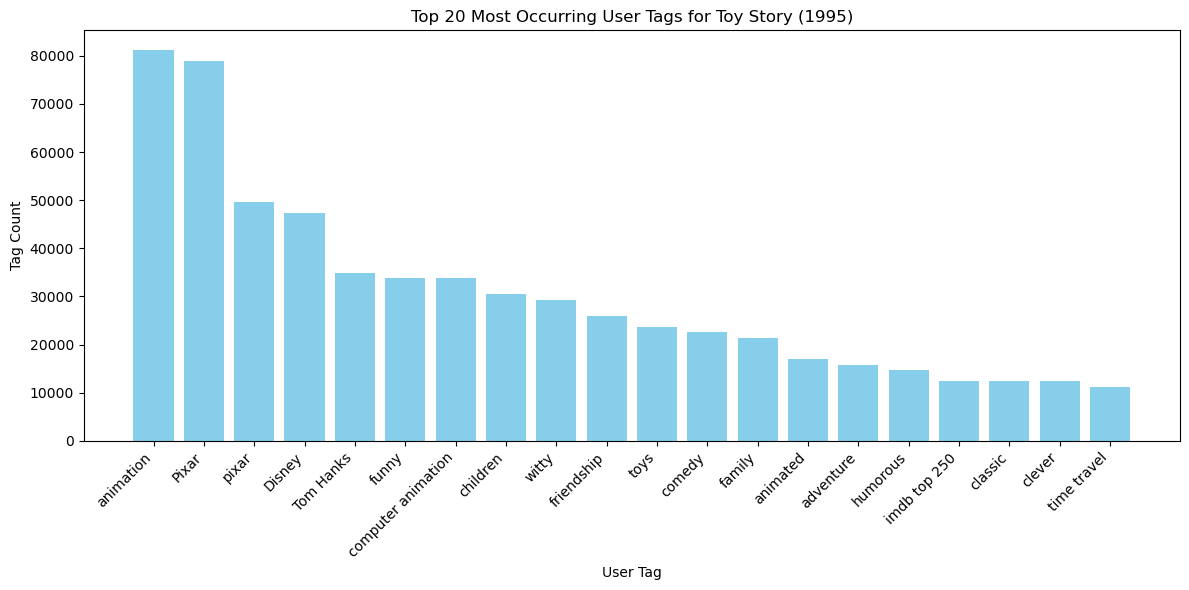

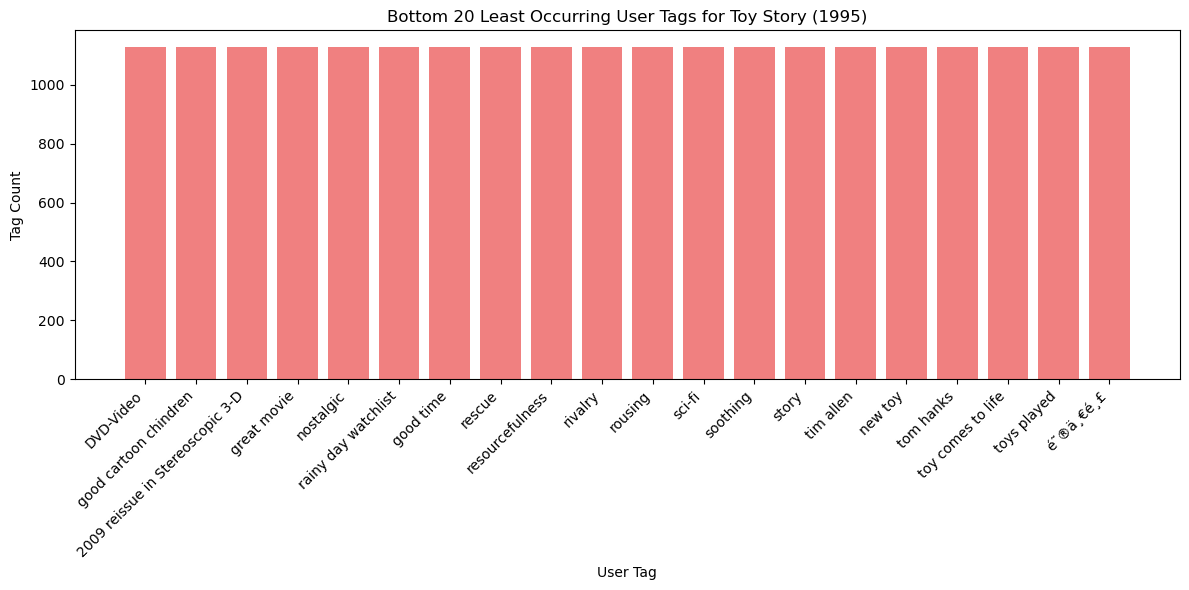

In [48]:
# Group by 'user_tag' and calculate the counts
user_tag_counts = all_tags_df['user_tag'].value_counts().reset_index()
user_tag_counts.columns = ['user_tag', 'count']

# Sort by count in descending order
sorted_user_tag_counts = user_tag_counts.sort_values(by='count', ascending=False)

# Top 20 most occurring user_tags
top_20_most_occuring = sorted_user_tag_counts.head(20)

# Bottom 20 least occurring user_tags
bottom_20_least_occuring = sorted_user_tag_counts.tail(20)

# Plotting top 20 most occurring user_tags
plt.figure(figsize=(12, 6))
plt.bar(top_20_most_occuring['user_tag'], top_20_most_occuring['count'], color='skyblue')
plt.xlabel('User Tag')
plt.ylabel('Tag Count')
plt.title('Top 20 Most Occurring User Tags for Toy Story (1995)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting bottom 20 least occurring user_tags
plt.figure(figsize=(12, 6))
plt.bar(bottom_20_least_occuring['user_tag'], bottom_20_least_occuring['count'], color='lightcoral')
plt.xlabel('User Tag')
plt.ylabel('Tag Count')
plt.title('Bottom 20 Least Occurring User Tags for Toy Story (1995)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Upon analyzing the results, it becomes evident that the top three tags, namely 'animation,' 'Pixar,' and 'Disney,' provide meaningful insights into the nature of the movie 'Toy Story (1995).' Conversely, some of the least mentioned user_tags such as 'DVD-Video,' 'story,' and 'good time' contribute less to our understanding of the movie.

In conclusion, it can be inferred that the frequency of a user_tag correlates with its relevance to the movie. Tags appearing more frequently tend to offer more meaningful and representative information about the movie, while less commonly used tags may not contribute significantly to the movie's characterization.

Number of unique tags: 73051
sci-fi                8330
atmospheric           6516
action                5907
comedy                5702
surreal               5326
based on a book       5079
twist ending          4820
funny                 4738
visually appealing    4526
dystopia              4257
Name: user_tag, dtype: int64


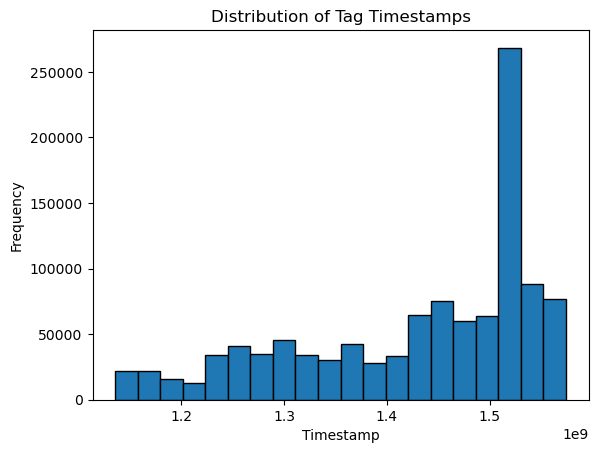

In [49]:
# Explore unique tags
unique_tags = eda_tags['user_tag'].unique()
print(f"Number of unique tags: {len(unique_tags)}")

# Count the frequency of each tag
tag_frequency = eda_tags['user_tag'].value_counts()
print(tag_frequency.head(10))

# Explore timestamp distribution
plt.hist(eda_tags['timestamp'], bins=20, edgecolor='black')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.title('Distribution of Tag Timestamps')
plt.show()

By examining the unique tags and their frequencies, you gain insights into the most common tags used by users. Analyzing the timestamp distribution helps you understand the temporal aspects of when these tags were assigned, providing information about user engagement over time.

These analyses can be valuable for understanding user behavior, preferences, and trends related to tagging movies. Depending on your modeling goals, you might use this information to enhance recommendation systems or understand user interactions with the tagging feature.

Let's examine the distribution of relevance scores.

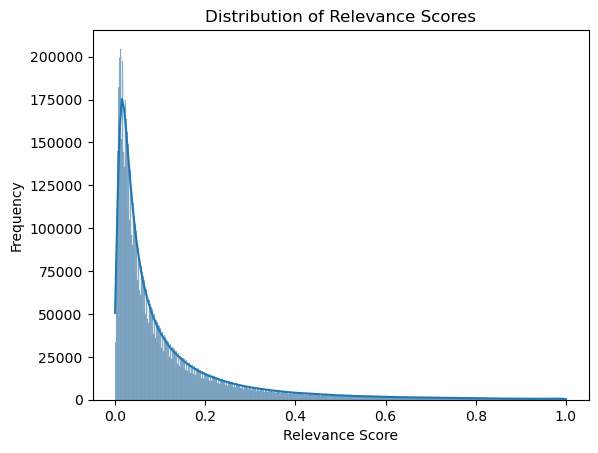

In [50]:
# Check the distribution of relevance scores
sns.histplot(eda_genome_scores['relevance'], kde=True)
plt.xlabel('Relevance Score')
plt.ylabel('Frequency')
plt.title('Distribution of Relevance Scores')
plt.show()

The distribution of relevance scores exhibits a pronounced rightward skewness, indicating a substantial imbalance between tags that are deemed relevant and those that are not. This observation holds significance for our model as it underscores the prevalence of tags with low relevance scores, suggesting that a considerable portion of user-assigned tags might not strongly contribute to characterizing the movies. Recognizing and understanding this skewness is crucial for refining our model's training and predictive capabilities.

The prominence of a right-skewed distribution implies that a majority of tags may have lower relevance values, potentially posing a challenge in accurately capturing meaningful associations between tags and movies. This understanding prompts us to explore strategies to address the skewed distribution, such as setting appropriate thresholds for relevance scores, focusing on the most relevant tags, or considering alternative weighting schemes during model development.

In the context of recommendation systems, acknowledging the skewness in relevance scores can guide us in designing models that prioritize the most pertinent tags, ensuring that the recommendations are driven by tags that genuinely contribute to characterizing a movie. Additionally, it prompts us to explore ways to handle less relevant tags effectively, either by filtering them out or assigning them reduced influence in the recommendation process.

Ultimately, a nuanced consideration of the relevance score distribution enables us to fine-tune our model, leading to more accurate and personalized movie recommendations by emphasizing tags that hold greater significance in capturing user preferences and characteristics of the movies.

Let's discuss how all of the above information can benefit each model:

**Collaborative-Based Model:**

- **User Tags:** The user-generated tags can provide insights into users' preferences and interests. Analyzing user tags can help identify patterns among users who share similar tastes. This information can be used to enhance collaborative filtering recommendations, where users with similar preferences are recommended items liked by others in the group.
- **Relevance Scores:** The relevance scores associated with genome tags can contribute to understanding the strength of the relationship between movies and tags. This information helps in weighting the importance of different tags when finding similar users.

**Content-Based Model:**

- **Genome Tags:** The genome tags, along with their relevance scores, can be used to build a content-based recommendation system. This model recommends items (movies) based on their content features (genome tags). By considering the relevance scores, you can assign different weights to tags, allowing the model to focus on more meaningful and relevant features.
**Movie Metadata:** Additional movie metadata such as genres, cast, directors, etc., can further enhance the content-based model. You can combine this information with genome tags to create a comprehensive representation of each movie.

**How the Information Helps Our Model:**

- **Personalization:** Understanding user preferences through tags allows for personalized recommendations. Users are more likely to engage with a system that tailors recommendations to their individual tastes.

- **Diversity:** Both models can benefit from the diversity of information. Collaborative filtering can capture trends and preferences in the user community, while content-based filtering ensures diverse recommendations based on specific features.

- **Relevance:** The relevance scores associated with genome tags provide a quantitative measure of how strongly a tag applies to a movie. This can be crucial for fine-tuning the recommendation system to suggest items that are not just related but highly relevant.

- **Hybrid Models:** You might also consider hybrid recommendation models that combine collaborative and content-based approaches. This allows you to leverage the strengths of both models for improved accuracy and coverage.

In summary, the combination of genome tags, user tags, and relevance scores can provide rich information for building robust recommendation systems. Consider experimenting with both collaborative-based and content-based models, and potentially explore hybrid models to achieve the best results.

#### **4.2.2. Genres:**

This section analyzes the distribution of genres in the dataset, visualizes it using a bar chart, and identifies the most and least common genres.

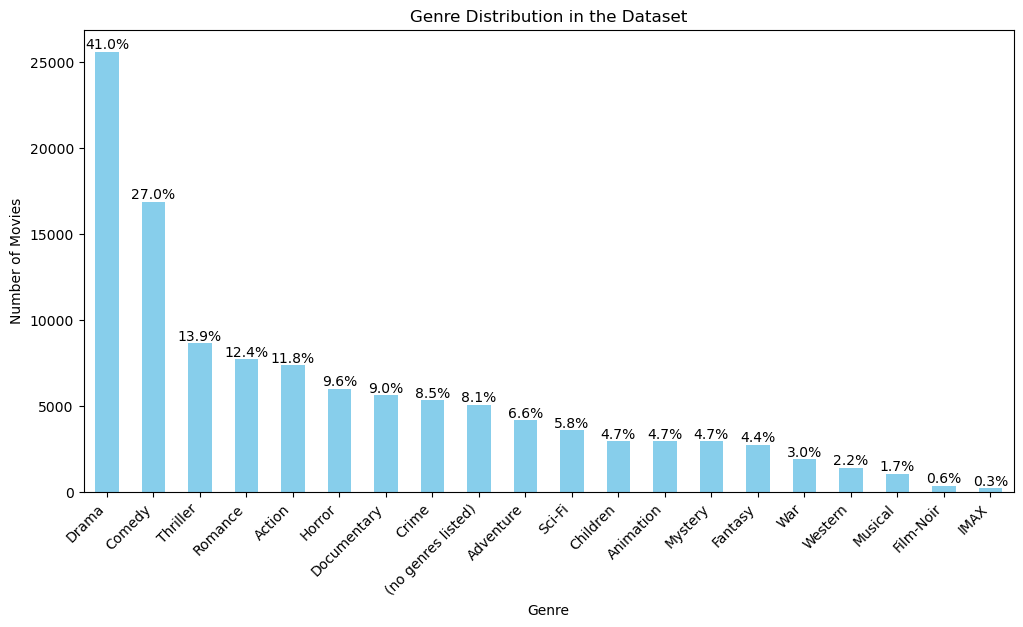

Most common genre: Drama
Least common genre: IMAX


In [51]:
# Extract genres and create a list
genres_list = eda_movies['genres'].str.split('|').explode()
# Count the occurrences of each genre
genre_counts = genres_list.value_counts()

# Plot the genre distribution
plt.figure(figsize=(12, 6))
ax = genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution in the Dataset')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')

# Add percentages on top of the bars
total_movies = len(eda_movies)
for p in ax.patches:
    percentage = '{:.1f}%'.format((p.get_height() / total_movies) * 100)
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = p.get_height()
    ax.annotate(percentage, (x_pos, y_pos), ha='center', va='bottom')

plt.show()

# Identify the most and least common genres
most_common_genre = genre_counts.idxmax()
least_common_genre = genre_counts.idxmin()

print(f"Most common genre: {most_common_genre}")
print(f"Least common genre: {least_common_genre}")

Upon scrutinizing the genre data, it becomes evident that the predominant genre is drama, closely followed by comedy, with both significantly surpassing others in frequency. Conversely, film-noir and IMAX emerge as the least common movie genres.

Understanding the prevalence of genres in the dataset is crucial for model development. This information can aid in creating a more informed and balanced model, ensuring it is trained on a representative distribution of genres. By acknowledging the popularity or scarcity of certain genres, the model can better capture the diverse landscape of movies and enhance its ability to make accurate predictions or recommendations.

In [52]:
# Create a DataFrame from the genre_counts Series
genre_df = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})

# Display the DataFrame
genre_df

,Genre,Count
0,Drama,25606
1,Comedy,16870
2,Thriller,8654
3,Romance,7719
4,Action,7348
5,Horror,5989
6,Documentary,5605
7,Crime,5319
8,(no genres listed),5062
9,Adventure,4145


Let's examine the average rating for each genre.

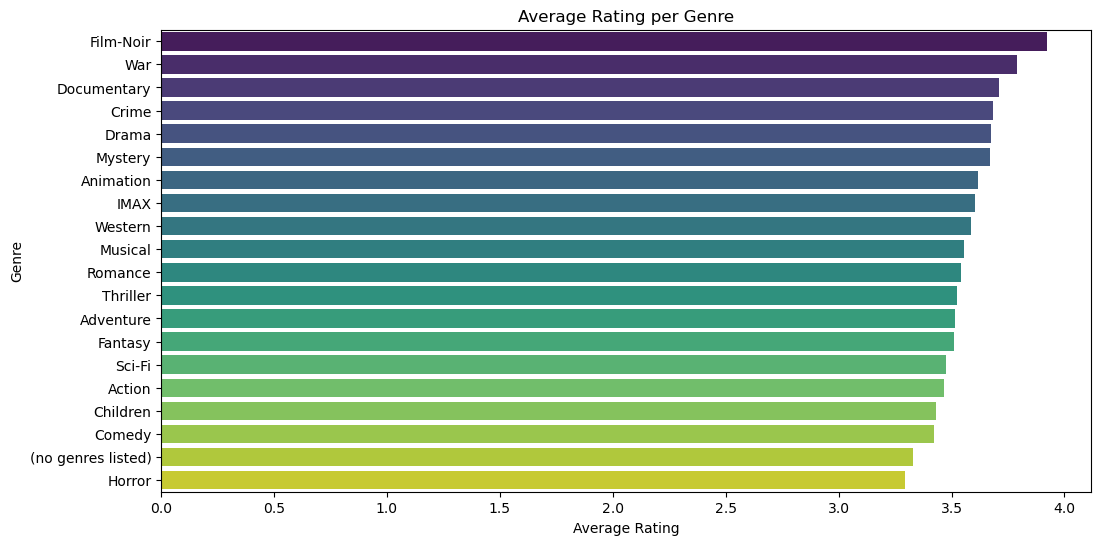

In [53]:
# Step 1: Extract genres and create a list
genres_list = eda_movies['genres'].str.split('|').explode()

# Step 2: Count the occurrences of each genre
genre_counts = genres_list.value_counts()

# Step 3: Merge the eda_movies and eda_train dataframes
merged_df = pd.merge(eda_movies, eda_train, on='movieId')

# Step 4: Split genres and calculate average rating for each genre
df_genres_with_ratings = merged_df.assign(genre=merged_df['genres'].str.split('|')).explode('genre')
df_genres_average_ratings = df_genres_with_ratings.groupby('genre')['rating'].mean().reset_index()

# Sort genres by average rating
df_genres_average_ratings = df_genres_average_ratings.sort_values(by='rating', ascending=False)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='genre', data=df_genres_average_ratings, palette='viridis')
plt.title('Average Rating per Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

It's intriguing to observe that despite being less common, Film-noir and Imax films tend to receive higher ratings, with Film-noir being the highest rated among them. This insight raises the question of whether incorporating the genre information, particularly for less prevalent genres like Film-noir and Imax, could potentially enhance the predictive power and accuracy of our recommendation model. Exploring the impact of genre diversity on ratings may provide valuable insights into user preferences and contribute to the refinement of our recommendation algorithms.

#### **4.2.3. Movie Count Over Time:**

Initially, we'll retrieve the release year from the `title` and establish a new column named `release_year`:

In [54]:
# Extract release year from the title and create a new column
eda_movies['release_year'] = eda_movies['title'].str.extract(r'\((\d{4})\)', expand=False)

# Convert the release year to numeric values
eda_movies['release_year'] = pd.to_numeric(eda_movies['release_year'], errors='coerce')

# Display the updated DataFrame
eda_movies[['title', 'release_year']]

,title,release_year
0,Toy Story (1995),1995.0
1,Jumanji (1995),1995.0
2,Grumpier Old Men (1995),1995.0
3,Waiting to Exhale (1995),1995.0
4,Father of the Bride Part II (1995),1995.0
...,...,...
62418,We (2018),2018.0
62419,Window of the Soul (2001),2001.0
62420,Bad Poems (2018),2018.0
62421,A Girl Thing (2001),2001.0


Next, we can examine the distribution of movie counts across different years:

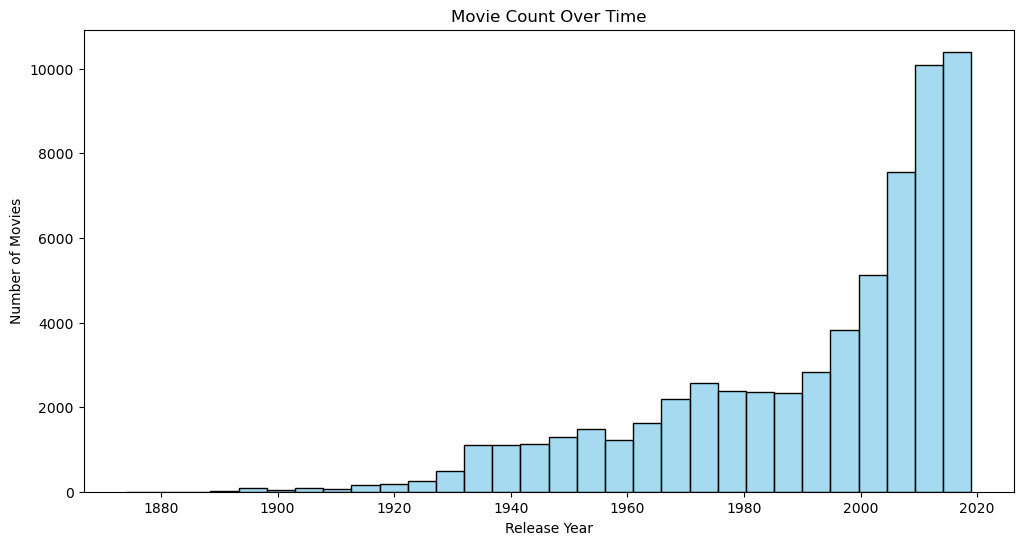

In [55]:
# Assuming there is a 'release_year' column
plt.figure(figsize=(12, 6))
sns.histplot(eda_movies['release_year'], bins=30, kde=False, color='skyblue')
plt.title('Movie Count Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

It is evident that a substantial majority of movies in the dataset were released during the period from 2000 to 2020. This observation could be attributed to various factors such as the surge in film production during this timeframe, evolving audience preferences, or increased accessibility to film production resources. Understanding the distribution of movie releases is crucial for our model as it allows us to adapt recommendations based on the temporal dynamics of the dataset.

The significance of this insight may vary between collaborative-based and content-based models. For collaborative-based models, which rely on user behavior patterns and preferences, the temporal distribution of movies could impact the relevance of recommendations based on popular trends over time. On the other hand, content-based models, which focus on the features of movies, might be less influenced by temporal dynamics unless specific temporal features are considered in the model. Adjusting the model based on the observed temporal trends can enhance its accuracy and relevance in providing recommendations tailored to user preferences over different periods.

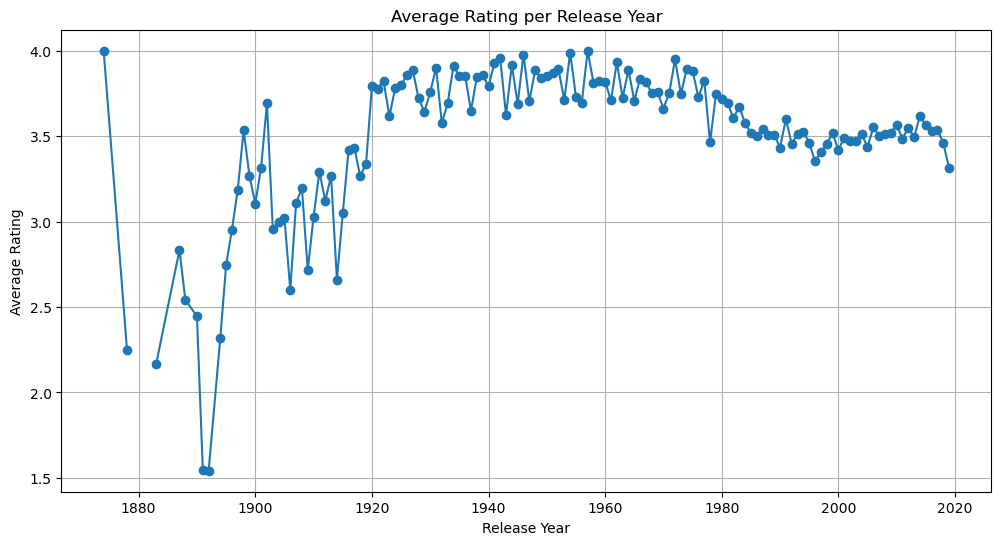

In [56]:
# Merge eda_movies with eda_train to get ratings for each movie
movies_with_ratings = pd.merge(eda_movies, eda_train, on='movieId', how='left')

# Extract release year from the title and create a new column
movies_with_ratings['release_year'] = movies_with_ratings['title'].str.extract(r'\((\d{4})\)', expand=False)

# Convert the release year to numeric values
movies_with_ratings['release_year'] = pd.to_numeric(movies_with_ratings['release_year'], errors='coerce')

# Group by release year and calculate average rating for each year
avg_rating_per_year = movies_with_ratings.groupby('release_year')['rating'].mean().reset_index()

# Drop rows with missing release years
avg_rating_per_year = avg_rating_per_year.dropna(subset=['release_year'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(avg_rating_per_year['release_year'], avg_rating_per_year['rating'], marker='o')
plt.title('Average Rating per Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

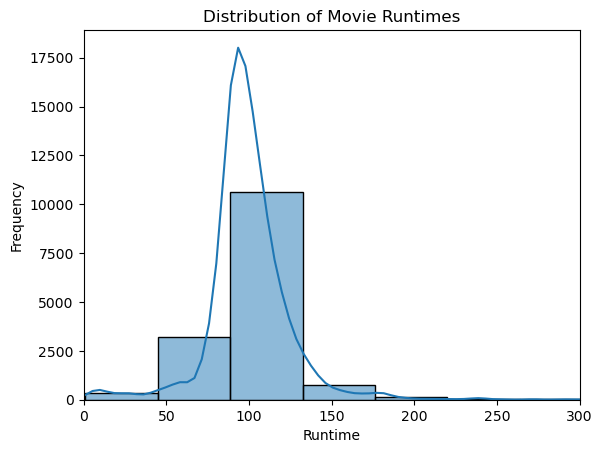

In [57]:
# Plot the distribution of movie runtimes
sns.histplot(eda_imdb_data['runtime'], bins=20, kde=True)
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')

# Set x-axis limit to go up to 300
plt.xlim(0, 300)

plt.show()

A majority of movies in our dataset fall within the runtime range of 90 to 130 minutes, outnumbering those with other durations.

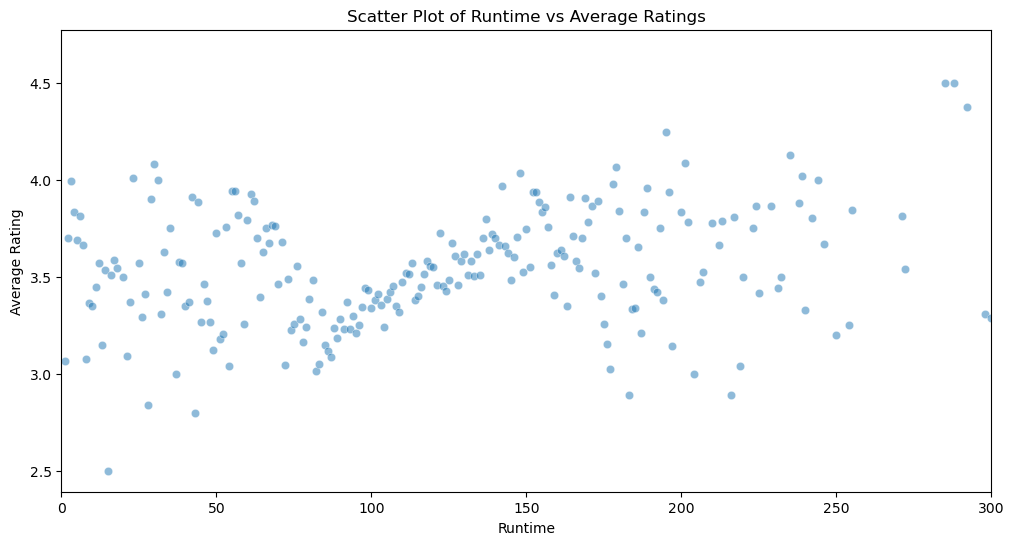

In [58]:
# Create SQLite database connection
conn = sqlite3.connect(':memory:')

# Convert dataframes to SQL tables
eda_imdb_data.to_sql('eda_imdb_data', conn, index=False)
eda_train.to_sql('eda_train', conn, index=False)

# SQL query to calculate average rating based on runtime
query = """
    SELECT e.runtime, AVG(t.rating) AS avg_rating
    FROM eda_imdb_data e
    JOIN eda_train t ON e.movieId = t.movieId
    GROUP BY e.runtime;
"""

# Execute the query and fetch the result into a DataFrame
avg_rating_by_runtime_sql = pd.read_sql_query(query, conn)

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='runtime', y='avg_rating', data=avg_rating_by_runtime_sql, alpha=0.5)
plt.title('Scatter Plot of Runtime vs Average Ratings')
plt.xlabel('Runtime')
plt.ylabel('Average Rating')
plt.xlim(0, 300)  # Set x-axis limit to 300
plt.show()

# Close SQLite connection
conn.close()

The graph illustrates that ratings for movies under 80 minutes exhibit considerable variability, while there is a notable increase in ratings within the 80 to 150-minute range. Movies longer than 150 minutes receive mixed reviews. The observed patterns suggest that there isn't a strong correlation between ratings and runtime. Consequently, it may not be advisable to include runtime as a significant feature in our model.

#### **4.2.4. Budget:**

Initially, let's explore the distribution of budgets.

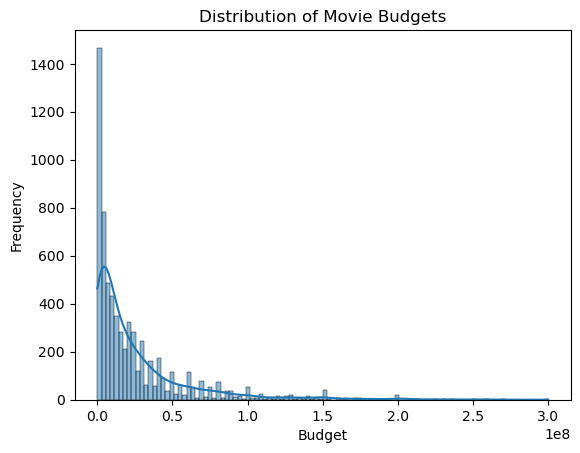

In [59]:
# Remove non-numeric characters from 'budget' column
eda_imdb_data['budget'] = eda_imdb_data['budget'].replace('[\$,GBP]', '', regex=True)

# Convert the 'budget' column to float
eda_imdb_data['budget'] = pd.to_numeric(eda_imdb_data['budget'], errors='coerce')

# Explore the distribution of budgets after conversion
sns.histplot(eda_imdb_data['budget'], kde=True)
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Budgets')
plt.show()

The distribution of movie budgets exhibits a significant rightward skew, indicating a prevalence of films with lower budgets compared to those with higher budgets. This insight can be valuable for our model, as it highlights the budgetary landscape in the movie dataset. Understanding this distribution may influence our modeling decisions, particularly in scenarios where budget considerations could play a role in predicting user preferences or other relevant outcomes. It allows us to grasp the budgetary diversity in the dataset, enabling us to make informed decisions on how to incorporate or handle budget-related features in our modeling approach.

To explore the potential correlation between a movie's budget and its average rating, the initial step involves cleansing the budget data associated with the movie.

In [60]:
# Create currency converter
c = CurrencyConverter()
available_currencies = list(c.currencies)

# Function to clean movie budget
def clean_and_convert_budget(budgetstring):
    # Check if the input is already a float
    if isinstance(budgetstring, float):
        return budgetstring  # Return the original float value as it is

    # Delete commas from input string
    budgetstring = budgetstring.replace(",", "")

    # If in USD, convert to correct int format
    if 'USD' in budgetstring:
        return int(budgetstring.replace("USD", "").strip())
    
    # Handle other cases or formats if needed

    # If none of the conditions match, return None or handle it accordingly
    return None

# Applying the function
df_eda_budget = eda_imdb_data[["movieId", 'budget']]
df_eda_budget['budget'] = df_eda_budget["budget"].apply(clean_and_convert_budget)
df_eda_budget.head()    

,movieId,budget
0,1,30000000.0
1,2,65000000.0
2,3,25000000.0
3,4,16000000.0
4,5,30000000.0


Now, let's perform a merge with eda_train to facilitate the comparison of average ratings based on each movie's budget.

In [61]:
# Merge df_eda_budget with eda_train on movieId
merged_df = pd.merge(df_eda_budget, eda_train, on='movieId')

# Group by movieId and budget, then calculate the average rating for each movie budget
average_rating_per_movie_budget = merged_df.groupby(['movieId', 'budget'])['rating'].mean().reset_index()

# Display the result
average_rating_per_movie_budget

,movieId,budget,rating
0,1,30000000.0,3.889971
1,2,65000000.0,3.263414
2,3,25000000.0,3.132325
3,4,16000000.0,2.878099
4,5,30000000.0,3.059165
...,...,...,...
6029,131013,40000000.0,3.159036
6030,131015,5000000.0,1.250000
6031,131062,1000000.0,1.000000
6032,131080,8000000.0,2.661765


Lastly, let's visualize the outcomes.

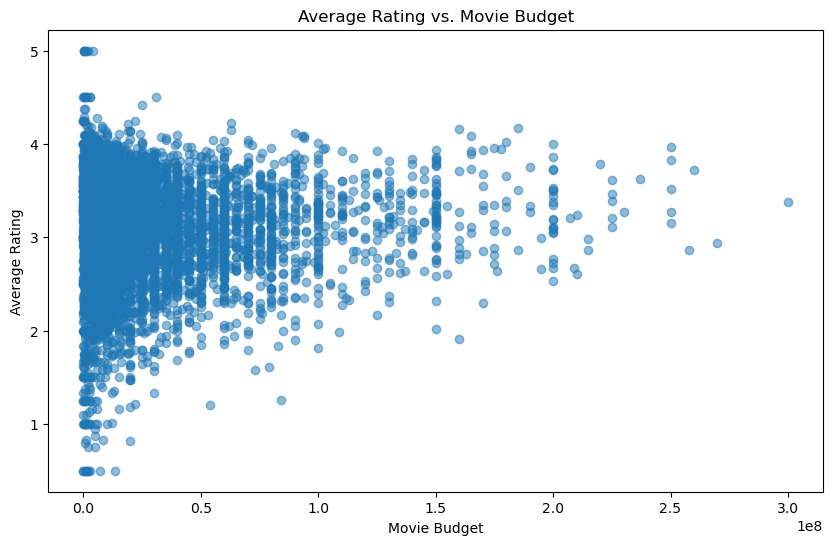

In [62]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_rating_per_movie_budget['budget'], average_rating_per_movie_budget['rating'], alpha=0.5)
plt.title('Average Rating vs. Movie Budget')
plt.xlabel('Movie Budget')
plt.ylabel('Average Rating')
plt.show()

Films with budgets less than $50 million exhibit a diverse range of ratings, spanning from the lowest to the highest. Beyond this threshold, the majority falls within a relatively mid-range rating. This information may not contribute significantly to our model, so we can exclude it from our engineered features.

#### **4.2.5. Directors:**

To begin, let's examine the most prominent directors in the dataset.

In [63]:
# Explore top directors
top_directors = eda_imdb_data['director'].value_counts().head(10)
top_directors

See full summary       28
Woody Allen            26
Luc Besson             26
Stephen King           24
William Shakespeare    19
Ki-duk Kim             17
Lars von Trier         15
Tyler Perry            15
Alex Gibney            14
Robert Rodriguez       14
Name: director, dtype: int64

Interestingly, the compilation of the top ten directors reveals the inclusion of notable authors such as Stephen King and William Shakespeare. This observation raises concerns about the accuracy of the dataset, suggesting a potential need for supplementation with more reliable data or, alternatively, considering the exclusion of such entries from further analysis.

#### **4.2.6. Ratings:**

We'll commence by examining the distribution of the ratings.

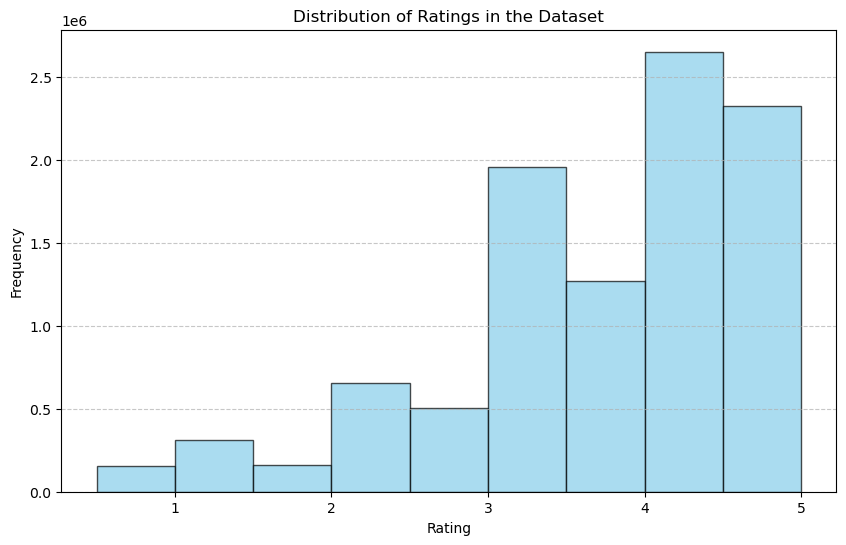

In [64]:
# Plot the rating distribution
plt.figure(figsize=(10, 6))
plt.hist(eda_train['rating'], bins=9, edgecolor='black', color='skyblue', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings in the Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Th distribution is skewed to the left, indicating higher overall ratings. The most frequently occurring rating in the dataset is 4, closely followed by a rating of 3. This pattern indicates a trend where users are less inclined to assign extreme values like 0.5 or 1.5, suggesting a general tendency towards moderate ratings. Understanding this distribution is crucial for our model, as it helps to interpret user preferences and discern the typical rating patterns in the dataset.

On average, each user has provided a total of 61.5 ratings. This metric indicates the typical level of engagement and feedback that users have contributed within the dataset. Understanding the average rating count per user is valuable for assessing user activity and involvement in the rating system.

Next, let's examine the top 25 highest-rated films and the bottom 25 lowest-rated films.

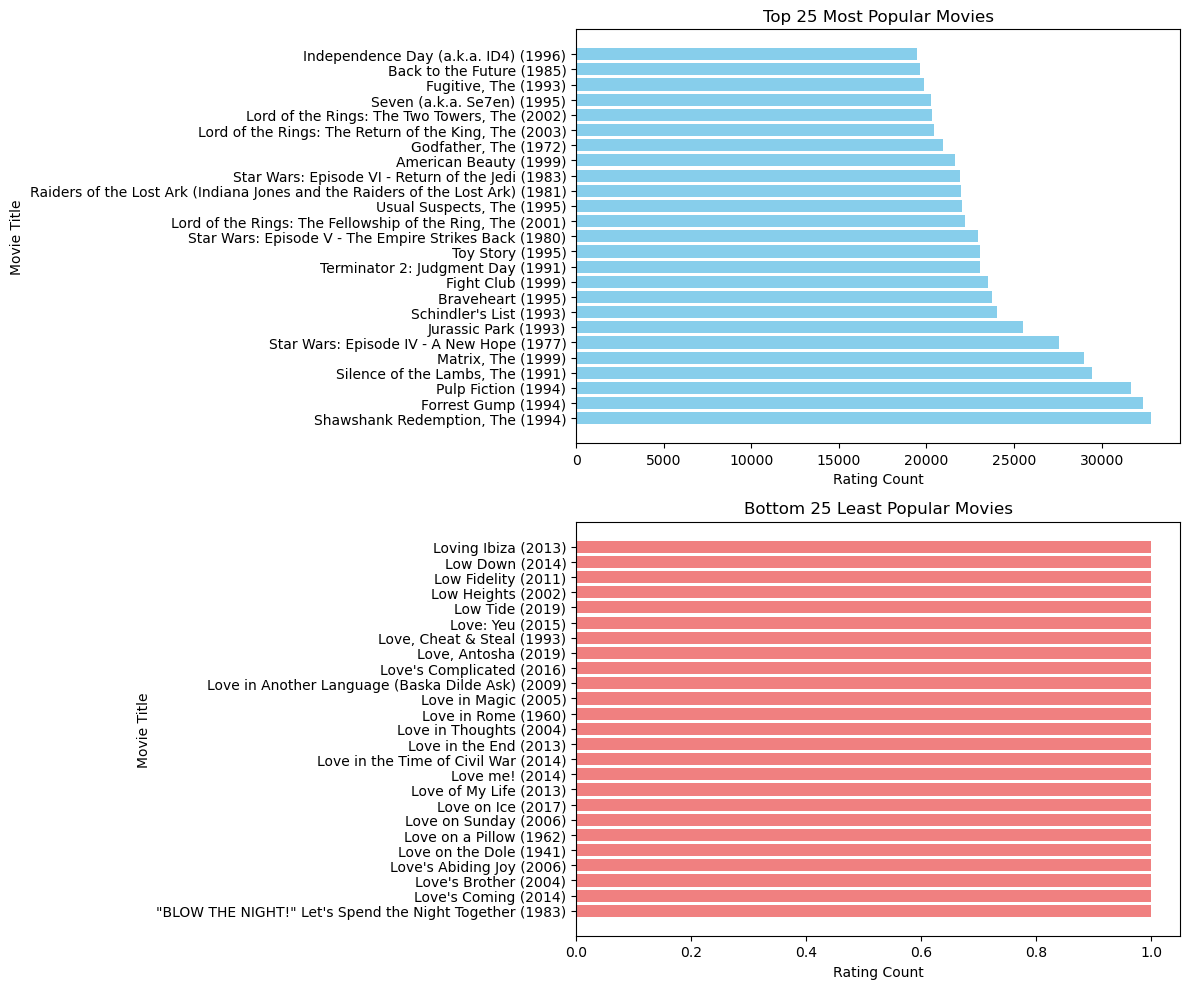

In [65]:
# Merge DataFrames using SQL
merged_data_sql = pd.merge(eda_train[['userId', 'movieId', 'rating']], eda_movies[['movieId', 'title']], on='movieId', how='inner')

# Calculate average rating and rating count for each movie
movie_ratings_sql = merged_data_sql.groupby('title')['rating'].agg(['mean', 'count'])
movie_ratings_sql = movie_ratings_sql.rename(columns={'mean': 'average_rating', 'count': 'rating_count'})

# Top 10 most popular movies
popular_movies = movie_ratings_sql.sort_values(by='rating_count', ascending=False).head(25)

# Top 10 least popular movies
unpopular_movies = movie_ratings_sql.sort_values(by='rating_count').head(25)

# Visualize the results
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Horizontal bar plot for most popular movies
axes[0].barh(popular_movies.index, popular_movies['rating_count'], color='skyblue')
axes[0].set_title('Top 25 Most Popular Movies')
axes[0].set_xlabel('Rating Count')
axes[0].set_ylabel('Movie Title')

# Horizontal bar plot for least popular movies
axes[1].barh(unpopular_movies.index, unpopular_movies['rating_count'], color='lightcoral')
axes[1].set_title('Bottom 25 Least Popular Movies')
axes[1].set_xlabel('Rating Count')
axes[1].set_ylabel('Movie Title')

plt.tight_layout()
plt.show()

It's evident that **"The Shawshank Redemption"** holds the top position as the most popular movie in our dataset, closely followed by **"Forrest Gump."** Upon analyzing the top 25 movies, a notable pattern emerges, revealing that many of them are classic films from the 1990s. Given their high number of ratings and consequent widespread viewership, it would be prudent to consider recommending some of these classics to new users on the platform, especially when little to no data on their preferences is available.

To further refine our recommendation list, we can incorporate both a movie's popularity, as indicated by its rating count, and its average rating. In this context, we focus on movies with more than 10,000 reviews to ensure a high level of popularity. By ordering these movies based on their average rating, we can offer recommendations that not only align with user preferences in terms of popularity but also consider the quality of the viewing experience.

In [66]:
# Merge DataFrames using SQL
merged_data_sql = pd.merge(eda_train[['userId', 'movieId', 'rating']], eda_movies[['movieId', 'title']], on='movieId', how='inner')

# Calculate average rating and rating count for each movie
movie_ratings_sql = merged_data_sql.groupby('title')['rating'].agg(['mean', 'count'])
movie_ratings_sql = movie_ratings_sql.rename(columns={'mean': 'average_rating', 'count': 'rating_count'})

# Filter movies with more than 10,000 reviews
top_movies = movie_ratings_sql[movie_ratings_sql['rating_count'] > 10000]

# Order top movies based on average rating
critically_acclaimed_movies = top_movies.sort_values(by='average_rating', ascending=False)

critically_acclaimed_movies

,average_rating,rating_count
title,,
"Shawshank Redemption, The (1994)",4.417624,32831
"Godfather, The (1972)",4.311355,20960
"Usual Suspects, The (1995)",4.278073,22032
"Godfather: Part II, The (1974)",4.274085,13525
Schindler's List (1993),4.247625,24004
...,...,...
Star Wars: Episode I - The Phantom Menace (1999),3.063559,12925
Ace Ventura: Pet Detective (1994),2.969948,14941
Dumb & Dumber (Dumb and Dumber) (1994),2.955215,12761


We have successfully identified two categories that could be recommended to new users. The first category, named *Popular Movies*, encompasses a list of the most rated movies on the platform. The second category, *Critically Acclaimed Movies*, features the highest-rated popular movies, emphasizing not only popularity but also the positive reception and acclaim from viewers. These recommendations aim to provide users with a diverse selection of films that cater to both widespread appeal and critical acclaim.

#### **4.2.7. User Activity:**

We'll commence by delving into the statistical analysis of user activity.

In [67]:
# Explore user activity (number of ratings per user)
user_activity = eda_train.groupby('userId')['rating'].count()
print(user_activity.describe())

count    162541.000000
mean         61.523173
std         107.410889
min           1.000000
25%          14.000000
50%          28.000000
75%          65.000000
max       12952.000000
Name: rating, dtype: float64


Furthermore, let's delve into the distribution of user activity.

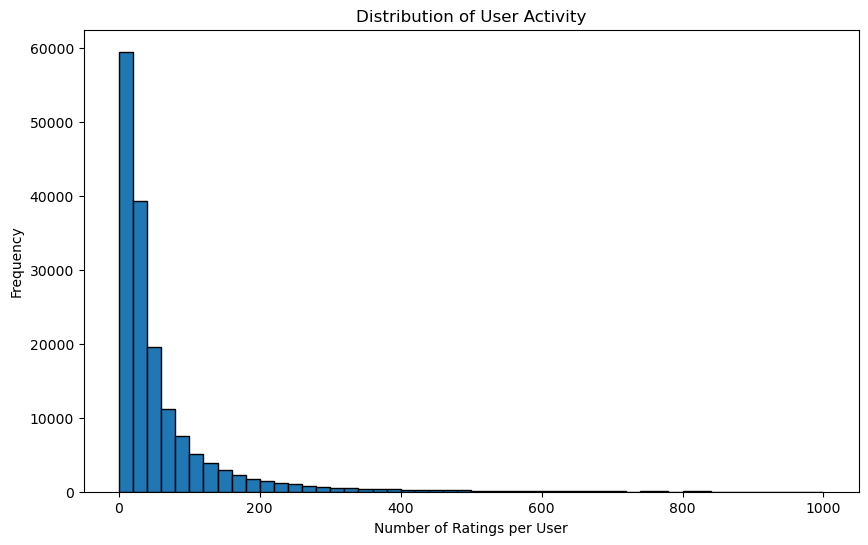

In [68]:
# Plot histogram with limited x-axis
plt.figure(figsize=(10, 6))
plt.hist(user_activity, bins=50, range=(0, 1000), edgecolor='black')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Frequency')
plt.title('Distribution of User Activity')
plt.show()

Let's break down each metric:

- **Count:** There are 162,541 unique users in the dataset.

- **Mean (Average):** On average, each user has given around 61.52 ratings.

- **Standard Deviation (Std):** The standard deviation is 107.41, indicating a considerable variability in the number of ratings among users.

- **Min (Minimum):** The minimum number of ratings given by a user is 1.

- **25th Percentile (Q1):** 25% of users have given 14 ratings or fewer.

- **50th Percentile (Median or Q2):** 50% of users have given 28 ratings or fewer. This is the median and represents the middle point of the distribution.

- **75th Percentile (Q3):** 75% of users have given 65 ratings or fewer.

- **Max (Maximum):** The maximum number of ratings given by a single user is 12,952.

These statistics provide insights into the distribution of user engagement in terms of rating activity. The high standard deviation and the large difference between the median and maximum suggest a right-skewed distribution, indicating that a few users are highly active, while the majority have lower levels of engagement.

Let's delve deeper into identifying the most active raters.

In [69]:
# Top ten most active users
top_active_users = user_activity.sort_values(ascending=False).head(20)

# Display the results
top_active_users

userId
72315     12952
80974      3680
137293     3588
33844      3208
20055      3050
109731     2671
49403      2670
92046      2579
110971     2288
30879      2284
115102     2278
75309      2184
122011     2084
29803      2081
93855      2061
78849      2048
61010      2039
57548      1999
34987      1958
8619       1929
Name: rating, dtype: int64

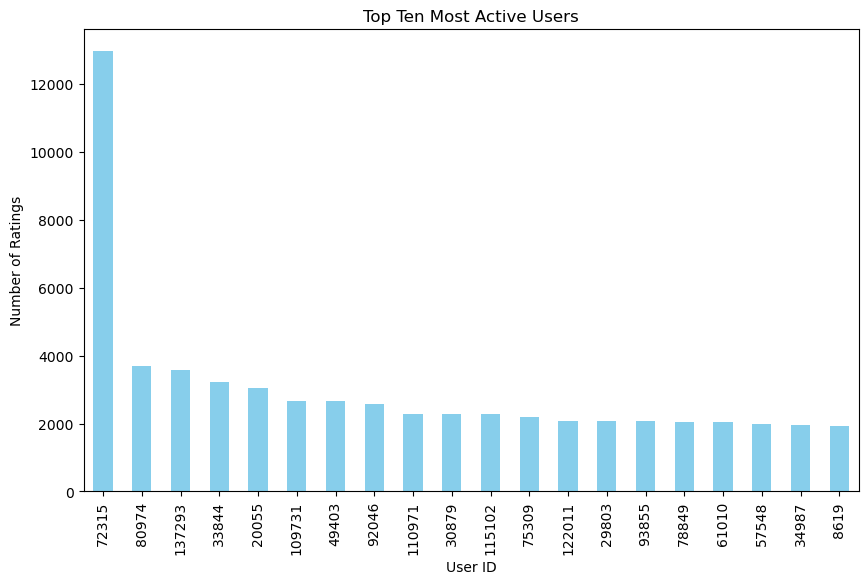

In [70]:
# Plotting the user activity for the top ten most active users
plt.figure(figsize=(10, 6))
top_active_users.plot(kind='bar', color='skyblue')
plt.title('Top Ten Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()

Evidently, user 72315 stands out as the most prolific rater, contributing approximately 8000 more ratings than the next active user. This significant discrepancy in rating activity has notable implications for our model. Considering the substantial dominance of user 72315 in the rating activity, it may be necessary to exclude this user from the equation to ensure a more balanced and representative rating system.

#### **4.2.8. Actors:**

We'll examine the actors starring in the movies. Initially, let's separate them into individual lists.

In [71]:
eda_imdb_data

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,30000000.0,toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,65000000.0,board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,25000000.0,boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,16000000.0,black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,30000000.0,fatherhood|doberman|dog|mansion
...,...,...,...,...,...,...
27273,131254,Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...,Carsten Funke,85.0,NaN,man wrapped in a towel|man wears a thong|male ...
27274,131256,Rick Kavanian|Axel Stein|Eva Habermann|Christo...,Matthias Dinter,83.0,NaN,ski|ski resort|ampersand in title|drink in title
27275,131258,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...,Seong-il Cheon,130.0,NaN,pirate|sword fight|korea|bandit
27276,131260,Martti Suosalo|Ilkka Koivula|Vexi Salmi|Riitta...,Timo Koivusalo,102.0,NaN,friend|friendship|television show|restaurant


In [72]:
# Split the actors in the 'title_cast' column by '|'
eda_imdb_data['title_cast'] = eda_imdb_data['title_cast'].str.split('|')

# Explode the lists into separate rows
eda_imdb_data = eda_imdb_data.explode('title_cast')

# Display the updated dataframe
eda_actors = eda_imdb_data[['movieId', 'title_cast']]

eda_actors

,movieId,title_cast
0,1,Tom Hanks
0,1,Tim Allen
0,1,Don Rickles
0,1,Jim Varney
0,1,Wallace Shawn
...,...,...
27277,131262,Mikal Evans
27277,131262,Daniel Zovatto
27277,131262,Evelina Turen
27277,131262,Rachel Heller


In [73]:
# Count the frequency of each actor
actor_frequency = eda_actors['title_cast'].value_counts()

# Display the actor frequency
print(actor_frequency)

Samuel L. Jackson          83
Steve Buscemi              68
Keith David                61
Willem Dafoe               59
Robert De Niro             58
                           ..
Kim Uylenbroek              1
Catinca Untaru              1
Damien Maestraggi           1
Charles-Edouard Renault     1
Noelle Beck                 1
Name: title_cast, Length: 121035, dtype: int64


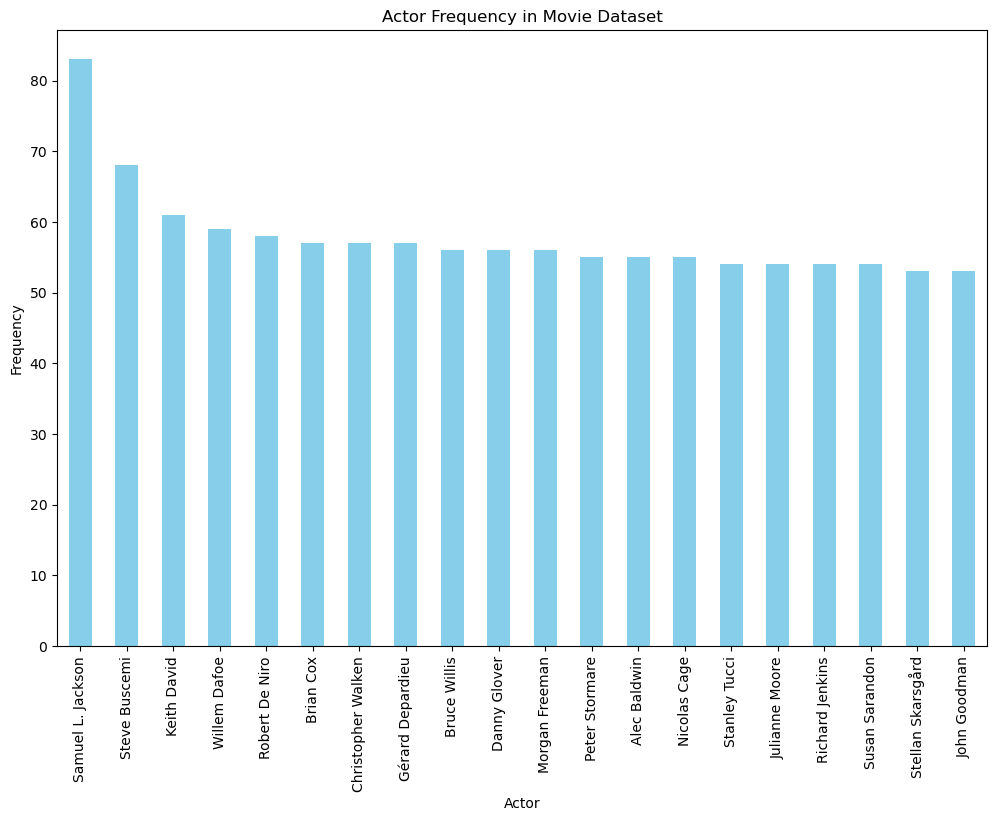

In [74]:
# Create a bar plot for the top 20 most frequent actors
plt.figure(figsize=(12, 8))
actor_frequency.head(20).plot(kind='bar', color='skyblue')
plt.title('Actor Frequency in Movie Dataset')
plt.xlabel('Actor')
plt.ylabel('Frequency')
plt.show()

Let's examine the highest-rated 500 actors:

In [75]:
# Create SQLite connection
conn = sqlite3.connect(':memory:')  # Use ':memory:' for in-memory database

# Write eda_actors and eda_train to SQLite tables
eda_actors.to_sql('eda_actors_table', conn, index=False)
eda_train.to_sql('eda_train_table', conn, index=False)

# Define the SQL query to get the top 500 actors based on average rating
query = """
    SELECT title_cast, COUNT(*) AS movie_count, AVG(rating) AS avg_rating
    FROM eda_actors_table
    LEFT JOIN eda_train_table ON eda_actors_table.movieId = eda_train_table.movieId
    GROUP BY title_cast
    HAVING movie_count >= 50  -- Include only actors in 50 or more movies
    ORDER BY avg_rating DESC
    LIMIT 500
"""

# Execute the query
top_500_actors_df = pd.read_sql_query(query, conn)

# Display the top 500 actors with their average ratings and movie counts
top_500_actors_df

,title_cast,movie_count,avg_rating
0,Brian Libby,32832,4.417624
1,Neil Giuntoli,33454,4.400143
2,Gil Bellows,34576,4.354723
3,James Whitmore,34475,4.349616
4,Joseph Ragno,34424,4.341894
...,...,...,...
495,Sabri Sulejmani,634,4.049685
496,Predrag Lakovic,634,4.049685
497,Ljubica Adzovic,634,4.049685
498,Jasar Destani,634,4.049685


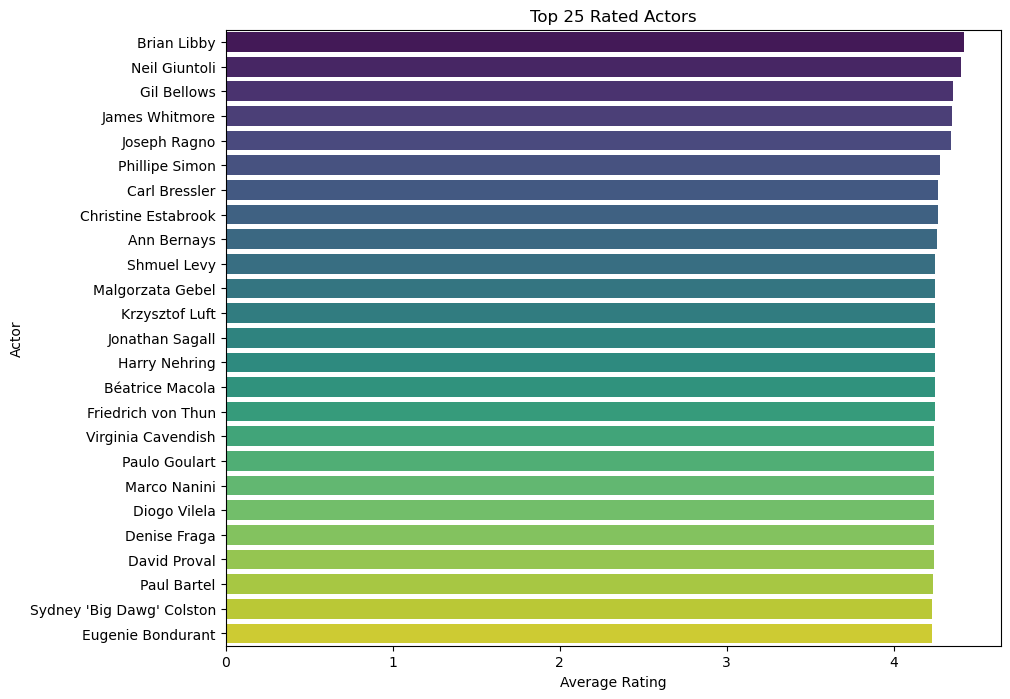

In [76]:
# Sort the DataFrame by average rating in descending order
top_500_actors_df = top_500_actors_df.sort_values(by='avg_rating', ascending=False)

# Plotting the horizontal bar graph for the top 25 actors
plt.figure(figsize=(10, 8))
sns.barplot(x='avg_rating', y='title_cast', data=top_500_actors_df.head(25), palette='viridis')
plt.title('Top 25 Rated Actors')
plt.xlabel('Average Rating')
plt.ylabel('Actor')
plt.show()

<a id="five"></a>
## 5. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we will clean the dataset, and create new features - as identified in the EDA phase. |

---

### **5.1. Merging Data:**

#### **5.1.1. User-Based Model:**

A user-based model is a type of recommendation system that leverages user preferences and behaviors to provide personalized suggestions. By analyzing the historical interactions and preferences of users, the model aims to understand their tastes and recommend items that align with their interests.

Let's construct a dataset tailored for a user-based model, designed to enhance the overall user experience. This dataset will encompass the columns `userId`, `movieId`, `user_tag`, and `rating`. Notably, our focus will be on movies that have received a rating of 3 or higher. This selective approach serves three primary objectives:

**Positive Feedback Focus:**
One key rationale for concentrating on movies with ratings exceeding 3 is the emphasis on positive feedback. If the overarching objective is to recommend movies that users are likely to enjoy or rate positively, filtering out movies with lower ratings becomes instrumental. This strategy directs the model to prioritize content that resonates positively with users' preferences.

**Reducing Noise:**
Movies with ratings below 3 may signify dissatisfaction or disinterest on the part of users. To enhance the effectiveness of our model, we opt to exclude these lower-rated movies. This strategic decision serves to diminish the impact of potentially less appealing content, resulting in a more refined and less noisy recommendation system. The intention is to spotlight movies that users are more inclined to appreciate, thereby contributing to a more personalized and positive user experience.

**User Satisfaction:**
The focus on recommending movies with higher ratings is rooted in the belief that user satisfaction is paramount. Users are more likely to engage with and trust a recommendation system that consistently suggests content aligned with their enjoyment. By tailoring recommendations to include movies with favorable ratings, our approach aligns with the overarching goal of providing a positive and gratifying user experience.

In [77]:
# Create SQLite connection
conn = sqlite3.connect(':memory:')

# Write eda_train and eda_tags to SQLite tables
eda_train.to_sql('eda_train_table', conn, index=False)
eda_tags.to_sql('eda_tags_table', conn, index=False)

# Define the userId to be removed
user_to_remove = 72315

# Define the SQL query to create df_user excluding the specified userId
query = """
    SELECT t1.userId, t1.movieId, t1.rating
    FROM eda_train_table t1
    JOIN eda_tags_table t2 ON t1.userId = t2.userId AND t1.movieId = t2.movieId
    WHERE t1.rating >= 3 AND t1.userId <> {}
""".format(user_to_remove)

# Execute the query
df_user = pd.read_sql_query(query, conn)

# Display the resulting dataframe
df_user

,userId,movieId,rating
0,78280,158966,4.5
1,78280,158966,4.5
2,78280,158966,4.5
3,78280,158966,4.5
4,78280,158966,4.5
...,...,...,...
285947,66626,4626,5.0
285948,66626,4626,5.0
285949,66626,4626,5.0
285950,66626,4626,5.0


In [78]:
# Rating count in eda_train
eda_train_rating_count = eda_train['rating'].count()

# Rating count in df_user (after filtering movies with a rating of 3 or higher)
df_user_rating_count = df_user['rating'].count()

# Calculate the percentage reduction
percentage_reduction = ((eda_train_rating_count - df_user_rating_count) / eda_train_rating_count) * 100

# Display the results
print(f"Rating count in eda_train: {eda_train_rating_count}")
print(f"Rating count in df_user: {df_user_rating_count}")
print(f"Percentage reduction: {percentage_reduction:.2f}%")

Rating count in eda_train: 10000038
Rating count in df_user: 285952
Percentage reduction: 97.14%


By exclusively considering movies with ratings surpassing 3, our dataset has undergone a substantial reduction of 97.14%! This highlights the significant amount of noise that has been effectively filtered out.

#### **5.1.2. Content-Based Model:**

A content-based model is a type of recommendation system that suggests items to users based on the characteristics or features of the items themselves. In a content-based model, recommendations are made by analyzing the properties of items and matching them with the preferences or past behavior of the user.

For the df_content database, the selected columns are:

- movieId: Unique identifier for each movie.
- genome_tag: Represents the features or characteristics of the movie, often obtained through analysis of user tags and other metadata.
- rating: User ratings for the movie.
- title_cast: Information about the cast of the movie.
- genres: Genre information associated with the movie.
- release_year: The year in which the movie was released.
- relevance: The relevance score associated with genome tags, indicating the importance of each feature.
- user_tags: Tags assigned by users to describe the movie.
- plot_keyword: Keywords associated with the movie's plot.

Excluding movies with a rating lower than 4 can be beneficial for two main reasons:

- **Quality Assurance:** By focusing on higher-rated movies, the content-based model aims to recommend items that users are more likely to enjoy. This helps in maintaining a level of quality in the recommendations.

- **User Satisfaction:** Recommending movies with higher ratings increases the likelihood of satisfying users. Users are more likely to trust and engage with a recommendation system that suggests content they enjoy.

Similarly, considering only genome tags with a relevance score higher than 0.8 is beneficial for the following reasons:

- **Feature Importance:** Genome tags with higher relevance scores are considered more important in representing the characteristics of a movie. Focusing on these tags helps in capturing the most relevant features for recommendation.

- **Noise Reduction:** Tags with lower relevance scores may introduce noise into the model, potentially leading to less accurate recommendations. Excluding less relevant tags helps in reducing noise and improving the precision of the content-based model.

In [79]:
# Create SQLite connection
conn = sqlite3.connect(':memory:')

# Write relevant dataframes to SQLite tables
eda_merged_genome.to_sql('eda_merged_genome_table', conn, index=False)
df_train.to_sql('eda_train_table', conn, index=False)
df_imdb_data.to_sql('eda_imdb_data_table', conn, index=False)
eda_movies.to_sql('eda_movies_table', conn, index=False)
df_tags.to_sql('eda_tags_table', conn, index=False)

# Updated query with DISTINCT and GROUP_CONCAT for genome_tags
query_content = """
    SELECT
        emg.movieId AS movieId,
        GROUP_CONCAT(DISTINCT emg.genome_tag) AS all_genome_tags,
        GROUP_CONCAT(DISTINCT em.genres) AS genres,
        et.rating AS rating,
        eid.title_cast AS title_cast,
        em.release_year AS release_year,
        MAX(emg.relevance) AS max_relevance,
        eid.plot_keywords AS plot_keywords,
        em.title AS title  -- Use the correct table alias for 'title'
    FROM
        eda_merged_genome_table emg
    JOIN
        eda_train_table et ON emg.movieId = et.movieId
    JOIN
        eda_imdb_data_table eid ON emg.movieId = eid.movieId
    JOIN
        eda_movies_table em ON emg.movieId = em.movieId
    WHERE
        et.rating >= 4
        AND emg.relevance >= 0.9
    GROUP BY
        emg.movieId, et.rating, eid.title_cast, em.release_year, eid.plot_keywords, em.title
    ORDER BY
        et.rating DESC
    LIMIT 100000;
"""

# Execute the query and save the results to a DataFrame
df_content = pd.read_sql_query(query_content, conn)

# Save the DataFrame to a new table in your database
table_name = 'df_content'
df_content.to_sql(table_name, conn, index=False, if_exists='replace')  # 'replace' will overwrite the table if it exists

# Close the database connection
conn.close()

In [80]:
df_content

,movieId,all_genome_tags,genres,rating,title_cast,release_year,max_relevance,plot_keywords,title
0,1,"animated,animation,cartoon,childhood,children,...",Adventure|Animation|Children|Comedy|Fantasy,5.0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,1995.0,0.99925,toy|rivalry|cowboy|cgi animation,Toy Story (1995)
1,2,"adventure,children,fantasy,jungle,kids,special...",Adventure|Children|Fantasy,5.0,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,1995.0,0.97600,board game|adventurer|fight|game,Jumanji (1995)
2,3,"good sequel,sequel,sequels",Comedy|Romance,5.0,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,1995.0,0.97525,boat|lake|neighbor|rivalry,Grumpier Old Men (1995)
3,4,women,Comedy|Drama|Romance,5.0,Whitney Houston|Angela Bassett|Loretta Devine|...,1995.0,0.97525,black american|husband wife relationship|betra...,Waiting to Exhale (1995)
4,5,"father daughter relationship,good sequel,midli...",Comedy,5.0,Steve Martin|Diane Keaton|Martin Short|Kimberl...,1995.0,0.96025,fatherhood|doberman|dog|mansion,Father of the Bride Part II (1995)
...,...,...,...,...,...,...,...,...,...
31647,131168,"betrayal,camp,criterion,holocaust",Drama,4.0,Nina Hoss|Ronald Zehrfeld|Nina Kunzendorf|Trys...,2014.0,0.96775,holocaust survivor|survivor|facial reconstruct...,Phoenix (2014)
31648,131170,alternate reality,Sci-Fi|Thriller,4.0,Mark Hapka|Jessica Rothe|Eric Jungmann|Constan...,2015.0,0.93875,multiverse|shot|backdoor pilot|man with a wido...,Parallels (2015)
31649,131237,"russia,russian",Comedy,4.0,Leonid Barats|Aleksandr Demidov|Kamil Larin|Ro...,2010.0,0.95000,road trip|russia|eavesdropping|advertising,What Men Talk About (2010)
31650,131248,"animals,animation,sequel,sequels",Adventure|Animation|Children|Comedy|Fantasy,4.0,Patrick Dempsey|Mandy Moore|Jeremy Suarez|Rick...,2006.0,0.98200,bear|finale|series finale|hate,Brother Bear 2 (2006)


Now, we can leverage these datasets for model training, leading to the generation of recommendations.

### **5.2. Cleaning Data:**

Initially, let's check for any missing values and subsequently eliminate them from our databases.

In [81]:
df_user.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

There are no null values.

Let's look at `df_content` now:

In [83]:
df_content.isnull().sum()

movieId                0
all_genome_tags        0
genres                 0
rating                 0
title_cast         10673
release_year           0
max_relevance          0
plot_keywords      10758
title                  0
dtype: int64

We will substitute the null values in the `plot_keywords` column with the words from `all_genome_tags` and eliminate the rows where `title_cast` contains null values:

In [84]:
# Create SQLite connection
conn = sqlite3.connect(':memory:')

# Write relevant dataframes to SQLite tables
eda_merged_genome.to_sql('eda_merged_genome_table', conn, index=False)
df_train.to_sql('eda_train_table', conn, index=False)
df_imdb_data.to_sql('eda_imdb_data_table', conn, index=False)
eda_movies.to_sql('eda_movies_table', conn, index=False)
df_tags.to_sql('eda_tags_table', conn, index=False)

# Updated query with DISTINCT and GROUP_CONCAT for genome_tags and plot_keywords
query_content = """
    SELECT
        emg.movieId AS movieId,
        GROUP_CONCAT(DISTINCT emg.genome_tag) AS all_genome_tags,
        GROUP_CONCAT(DISTINCT em.genres) AS genres,
        et.rating AS rating,
        eid.title_cast AS title_cast,
        em.release_year AS release_year,
        MAX(emg.relevance) AS max_relevance,  -- Using MAX to get a single value for relevance
        GROUP_CONCAT(DISTINCT eid.plot_keywords) AS all_plot_keywords,  -- Concatenating distinct plot_keywords
        em.title AS title  -- Include 'title' from eda_movies
    FROM
        eda_merged_genome_table emg
    JOIN
        eda_train_table et ON emg.movieId = et.movieId
    JOIN
        eda_imdb_data_table eid ON emg.movieId = eid.movieId
    JOIN
        eda_movies_table em ON emg.movieId = em.movieId
    WHERE
        et.rating >= 4
        AND emg.relevance >= 0.8
    GROUP BY
        emg.movieId, et.rating, eid.title_cast, em.release_year, em.title
    ORDER BY
        et.rating DESC
    LIMIT 100000;
"""

# Execute the query and save the results to a DataFrame
df_content = pd.read_sql_query(query_content, conn)

# Replace null plot_keywords with all_genome_tags
df_content['all_plot_keywords'].fillna(df_content['all_genome_tags'], inplace=True)

# Delete rows with null values in title_cast
df_content = df_content.dropna(subset=['title_cast'])

# Save the DataFrame to a new table in your database
table_name = 'df_content'
df_content.to_sql(table_name, conn, index=False, if_exists='replace')  # 'replace' will overwrite the table if it exists

# Close the database connection
conn.close()

Let's check for any duplicates in our datase:

In [87]:
# Check for duplicates based on all columns
duplicates_all_columns = df_content[df_content.duplicated()]

# Check for duplicates based on specific columns (e.g., 'movieId' and 'title')
duplicates_specific_columns = df_content[df_content.duplicated(subset=['movieId', 'title'])]

# Display the results
print("Duplicates based on all columns:")
duplicates_all_columns

print("\nDuplicates based on specific columns:")
duplicates_specific_columns

Duplicates based on all columns:

Duplicates based on specific columns:


,movieId,all_genome_tags,genres,rating,title_cast,release_year,max_relevance,all_plot_keywords,title
11130,1,"adventure,animated,animation,cartoon,cgi,child...",Adventure|Animation|Children|Comedy|Fantasy,4.5,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,1995.0,0.99925,toy|rivalry|cowboy|cgi animation,Toy Story (1995)
11131,2,"adventure,animals,based on a book,childhood,ch...",Adventure|Children|Fantasy,4.5,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,1995.0,0.97600,board game|adventurer|fight|game,Jumanji (1995)
11132,3,"comedy,good sequel,sequel,sequels",Comedy|Romance,4.5,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,1995.0,0.97525,boat|lake|neighbor|rivalry,Grumpier Old Men (1995)
11133,4,"chick flick,divorce,women",Comedy|Drama|Romance,4.5,Whitney Houston|Angela Bassett|Loretta Devine|...,1995.0,0.97525,black american|husband wife relationship|betra...,Waiting to Exhale (1995)
11134,5,"comedy,family,father daughter relationship,goo...",Comedy,4.5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,1995.0,0.96025,fatherhood|doberman|dog|mansion,Father of the Bride Part II (1995)
...,...,...,...,...,...,...,...,...,...
33785,131168,"betrayal,camp,criterion,enigmatic,guilt,holoca...",Drama,4.0,Nina Hoss|Ronald Zehrfeld|Nina Kunzendorf|Trys...,2014.0,0.96775,holocaust survivor|survivor|facial reconstruct...,Phoenix (2014)
33786,131170,"alternate reality,bad ending,great ending,orig...",Sci-Fi|Thriller,4.0,Mark Hapka|Jessica Rothe|Eric Jungmann|Constan...,2015.0,0.93875,multiverse|shot|backdoor pilot|man with a wido...,Parallels (2015)
33787,131237,"fun movie,funny,good,original,russia,russian",Comedy,4.0,Leonid Barats|Aleksandr Demidov|Kamil Larin|Ro...,2010.0,0.95000,road trip|russia|eavesdropping|advertising,What Men Talk About (2010)
33788,131248,"animals,animation,disney,disney animated featu...",Adventure|Animation|Children|Comedy|Fantasy,4.0,Patrick Dempsey|Mandy Moore|Jeremy Suarez|Rick...,2006.0,0.98200,bear|finale|series finale|hate,Brother Bear 2 (2006)


We have 14533 duplicates. Let's remove them from the dataset.

In [88]:
df_content = df_content.drop_duplicates(subset=['movieId', 'title'])

In [89]:
df_content

,movieId,all_genome_tags,genres,rating,title_cast,release_year,max_relevance,all_plot_keywords,title
0,1,"adventure,animated,animation,cartoon,cgi,child...",Adventure|Animation|Children|Comedy|Fantasy,5.0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,1995.0,0.99925,toy|rivalry|cowboy|cgi animation,Toy Story (1995)
1,2,"adventure,animals,based on a book,childhood,ch...",Adventure|Children|Fantasy,5.0,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,1995.0,0.97600,board game|adventurer|fight|game,Jumanji (1995)
2,3,"comedy,good sequel,sequel,sequels",Comedy|Romance,5.0,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,1995.0,0.97525,boat|lake|neighbor|rivalry,Grumpier Old Men (1995)
3,4,"chick flick,divorce,women",Comedy|Drama|Romance,5.0,Whitney Houston|Angela Bassett|Loretta Devine|...,1995.0,0.97525,black american|husband wife relationship|betra...,Waiting to Exhale (1995)
4,5,"comedy,family,father daughter relationship,goo...",Comedy,5.0,Steve Martin|Diane Keaton|Martin Short|Kimberl...,1995.0,0.96025,fatherhood|doberman|dog|mansion,Father of the Bride Part II (1995)
...,...,...,...,...,...,...,...,...,...
33644,121253,"blood,bloody,brutal,brutality,clever,crime,gre...",Horror|Thriller,4.0,Addison Timlin|Veronica Cartwright|Anthony And...,2014.0,0.97300,younger version of character|characters murder...,The Town that Dreaded Sundown (2014)
33707,127315,"alien,alien invasion,aliens,fake documentary,f...",Action|Sci-Fi|Thriller,4.0,Adrian Paul|Reiley McClendon|Brandon Auret|Joe...,2014.0,0.99475,independent film|alien|alien invasion|soldier,Alien Outpost (2014)
33754,130044,"blindness,werewolf,werewolves",Drama|Horror,4.0,Nick Damici|Ethan Embry|Lance Guest|Erin Cummi...,2014.0,0.98475,veteran|blind|dog|neighbourhood,Late Phases (2014)
33758,130083,"bank robbery,based on true story,heist,kidnapp...",Action|Crime|Drama|Thriller,4.0,Jim Sturgess|Sam Worthington|Ryan Kwanten|Anth...,2015.0,0.99175,beer|car chase|tycoon|ransom,Kidnapping Mr. Heineken (2015)


Let's check if it worked:

In [90]:
df_content.isnull().sum()

movieId              0
all_genome_tags      0
genres               0
rating               0
title_cast           0
release_year         0
max_relevance        0
all_plot_keywords    0
title                0
dtype: int64

Null values have been successfully eliminated from our dataset.

Let's also remove the genres that state '(no genre listed)' as it migh confuse our model. 

In [91]:
# Remove unlisted genre descriptions
df_content['genres'] = df_content['genres'].str.replace( "(no genres listed)" ,"")

### **5.3. Natural Language Processing:**

Natural Language Processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and human language. It involves the development of algorithms and computational models that enable computers to understand, interpret, and generate human language in a way that is both meaningful and contextually relevant.

NLP techniques often involve the use of machine learning, deep learning, and linguistic principles to teach computers how to understand and process human language. The goal is to enable machines to perform language-related tasks with a level of accuracy and sophistication that approaches or surpasses human capabilities. NLP has a wide range of applications in various industries, including healthcare, finance, customer service, and more.

In [92]:
nlp_content = df_content

In [93]:
# Process text data
def clean_text_features(df):
    # Features to process

    features = ['title_cast', 'all_genome_tags', 'all_plot_keywords', 'genres', 'title']

    # Apply changes to all features
    for feature in features:
        # Replace spaces with underscores to ensure multiple-worded concepts gets treated as single entity
        df[feature] = df[feature].str.replace(' ', '_')

        # Replace pipe symbol (|) with space to separate different entities
        df[feature] = df[feature].str.replace('|', ' ').str.replace(',', ' ')

        # Convert string to lowercase to avoid unwanted distinctions
        df[feature] = df[feature].str.lower()

    return df

In [94]:
# Applying the function
nlp_content = clean_text_features(nlp_content)

# Verifying changes
nlp_content

,movieId,all_genome_tags,genres,rating,title_cast,release_year,max_relevance,all_plot_keywords,title
0,1,adventure animated animation cartoon cgi child...,adventure animation children comedy fantasy,5.0,tom_hanks tim_allen don_rickles jim_varney wal...,1995.0,0.99925,toy rivalry cowboy cgi_animation,toy_story_(1995)
1,2,adventure animals based_on_a_book childhood ch...,adventure children fantasy,5.0,robin_williams jonathan_hyde kirsten_dunst bra...,1995.0,0.97600,board_game adventurer fight game,jumanji_(1995)
2,3,comedy good_sequel sequel sequels,comedy romance,5.0,walter_matthau jack_lemmon sophia_loren ann-ma...,1995.0,0.97525,boat lake neighbor rivalry,grumpier_old_men_(1995)
3,4,chick_flick divorce women,comedy drama romance,5.0,whitney_houston angela_bassett loretta_devine ...,1995.0,0.97525,black_american husband_wife_relationship betra...,waiting_to_exhale_(1995)
4,5,comedy family father_daughter_relationship goo...,comedy,5.0,steve_martin diane_keaton martin_short kimberl...,1995.0,0.96025,fatherhood doberman dog mansion,father_of_the_bride_part_ii_(1995)
...,...,...,...,...,...,...,...,...,...
33644,121253,blood bloody brutal brutality clever crime gre...,horror thriller,4.0,addison_timlin veronica_cartwright anthony_and...,2014.0,0.97300,younger_version_of_character characters_murder...,the_town_that_dreaded_sundown_(2014)
33707,127315,alien alien_invasion aliens fake_documentary f...,action sci-fi thriller,4.0,adrian_paul reiley_mcclendon brandon_auret joe...,2014.0,0.99475,independent_film alien alien_invasion soldier,alien_outpost_(2014)
33754,130044,blindness werewolf werewolves,drama horror,4.0,nick_damici ethan_embry lance_guest erin_cummi...,2014.0,0.98475,veteran blind dog neighbourhood,late_phases_(2014)
33758,130083,bank_robbery based_on_true_story heist kidnapp...,action crime drama thriller,4.0,jim_sturgess sam_worthington ryan_kwanten anth...,2015.0,0.99175,beer car_chase tycoon ransom,kidnapping_mr._heineken_(2015)


Now that our data has been cleaned, let's begin the preprocessing of the model.

<a id="six"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we will create models that are able to accurately recommend movies to users. |

---

### **6.1. Preprocessing:**

#### **6.1.1. User-Based Model:**

#### *6.1.1.2. Principal Component Analysis (PCA):*

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional representation while retaining as much of the original variance as possible. It achieves this by identifying the principal components, which are linear combinations of the original features. These principal components are orthogonal, meaning they are uncorrelated.

Standardizing the data before applying PCA is important because PCA is sensitive to the scale of the features. Features with larger scales can dominate the principal components, leading to biased results. Standardization involves transforming the data such that each feature has a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the principal components, preventing any single feature from having a disproportionate impact on the analysis.

By standardizing the data, PCA becomes more robust and reliable, as it focuses on the inherent structure and relationships between variables rather than being influenced by the scale of the data. This step is crucial for obtaining meaningful principal components that accurately represent the underlying patterns in the data, making the results of PCA more interpretable and applicable in various analytical contexts.

#### **6.1.2. Content-Based Model:**

#### *6.1.2.1. Vectorizer:*

Vectorizing data involves converting textual information into a numerical format suitable for machine learning algorithms. In the context of NLP, words and documents are transformed into numerical vectors, enabling machines to process and analyze the data efficiently. This process facilitates the application of various machine learning models, such as classifiers or clustering algorithms, which require numerical input. Vectorization captures the semantic relationships between words and documents, allowing algorithms to identify patterns, make predictions, and derive meaningful insights from textual data. Essentially, it transforms the complexity of language into a structured representation that machines can understand and learn from, bridging the gap between human language and computational analysis.

In [95]:
# Function to combine movie features
def combine_content_features(row):
    title = row['title'].replace(' ', '_').lower()  # Normalize movie title
    return f"{title} {row['title_cast']} {row['all_plot_keywords']} {row['genres']} {row['all_genome_tags']}"

# Creating a copy of the data for use in the content-based filter
content_filter_data = nlp_content.copy()

# Making sure we convert all text data to string datatype
content_filter_data['title_cast'] = content_filter_data['title_cast'].astype(str)
content_filter_data['all_plot_keywords'] = content_filter_data['all_plot_keywords'].astype(str)
content_filter_data['genres'] = content_filter_data['genres'].astype(str)
content_filter_data['all_genome_tags'] = content_filter_data['all_genome_tags'].astype(str)

# Applying the function
content_filter_data['combined_features'] = content_filter_data.apply(combine_content_features, axis=1)

# Filter out only necessary features
content_filter_data = content_filter_data[['movieId', 'title', 'combined_features']]

# Filter out movies with no combined features
content_filter_data = content_filter_data[content_filter_data['combined_features'].notnull()]

# Reset index after filtering
content_filter_data.reset_index(drop=True, inplace=True)

# Create list of titles
content_filter_titles = content_filter_data['title']

# Create a dictionary to map titles to data
content_filter_indices = dict(zip(content_filter_titles, range(len(content_filter_titles))))

# Initializing a vectorizer object
tfidf = TfidfVectorizer(min_df=CONTENT_VEC_MIN_WORD_TO_REMOVE, stop_words=stopwords.words('english'), ngram_range=(1, 2), max_features=MAX_TEXT_FEATURES)

# Produce a feature matrix, where each row corresponds to a movie with TF-IDF features as columns
content_vec_df = tfidf.fit_transform(content_filter_data['combined_features'])

dense_matrix = content_vec_df.toarray()

# Create a DataFrame with the dense matrix
content_vec_df = pd.DataFrame(data=dense_matrix, columns=tfidf.get_feature_names_out())

In [96]:
content_vec_df

,007_,007_ series,11,13,13 plot,13 plot_holes,13 special_effects,18th_century,1920s,1930s,...,zach_galifianakis,zach_grenier,zak_orth,zeljko_ivanek,zoe_kazan,zoe_saldana,zombie,zombie zombies,zombies,zooey_deschanel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Having obtained exclusively numerical values, we can now proceed with reducing the dimensionality of the data.

Let's begin by standardizing the data:

Now, let's proceed with constructing models and generating predictions.

### **6.2. Building Models:**

#### **6.2.1. User-Based Model:**

#### **6.2.2. Content-Based Model:**

In the realm of movie recommendations, content-based models utilize cosine similarity to suggest films based on their content features. Each movie is represented as a high-dimensional vector, incorporating attributes such as genres, cast, plot keywords, and more. TF-IDF may be employed to encode textual features like plot summaries, as was done above. The cosine similarity matrix is then constructed, reflecting the pairwise similarities between movies. When a user's preferences are represented as a vector, the cosine similarity between the user profile and movie vectors is computed to recommend films that align with the user's tastes. This approach excels in offering personalized movie suggestions by emphasizing the content similarities between movies, allowing users to discover films with comparable thematic elements, genres, or key characteristics.

In [97]:
# Create similarity matrix
content_filter_sim_matrix = cosine_similarity(content_vec_df, content_vec_df)

Now, the remaining task is to identify the most closely related movies based on a given movie input:

In [98]:
# Function to recommend movies based on content filtering
def predict_similar_movies(movie_input, number_of_predictions=5):

    # Find all movies containing movie_input as a substring
    movie_list = [movie for movie in content_filter_titles if str.lower(movie_input) in str.lower(movie)]
    
    # No movies of that title in the dataset
    if len(movie_list) == 0:
        return "No movies found. Please check that you have the correct title in mind"
    
    # Multiple movies matching the input
    elif len(movie_list) != 1:
        movie_list.insert(0, "Multiple movies match your input. Please select one of the following:")
        return movie_list

    else:
        # Obtain the movie index based on the input
        m_index = content_filter_indices[movie_list[0]]

        # Extract similarity scores computed with the reference movie
        sim_scores = list(enumerate(content_filter_sim_matrix[m_index]))

        # Sort the values, keeping a copy of the original index of each value
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Select the top-N values for recommendation
        sim_scores = sim_scores[1:number_of_predictions]

        # Collect indexes 
        movie_indices = [i[0] for i in sim_scores]

        # Convert the indexes back into titles 
        similar_movies = list(content_filter_titles.iloc[movie_indices].values) 

        # Return list of recommended movies
        return 'Here are your recommendations:', similar_movies[:number_of_predictions]

Now we can make some predictions. Please use this format to predict movies "phoenix_(2014)" instead on "Phoenix (2014)".

In [100]:
# Movie to use as a reference
your_favorite_movie = "toy_story_(1995)"

# Amount of recommendations
amount_to_recommend = 10

# Applying the function
prediction_content = predict_similar_movies(your_favorite_movie, amount_to_recommend)

# Displaying the result
prediction_content

('Here are your recommendations:',
 ['toy_story_2_(1999)',
  'monsters _inc._(2001)',
  "bug's_life _a_(1998)",
  'toy_story_3_(2010)',
  'finding_nemo_(2003)',
  'up_(2009)',
  'lilo_&_stitch_(2002)',
  'toy_story_toons:_small_fry_(2011)',
  'aladdin_(1992)'])

<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section we will compare the relative performance of the various trained machine learning models on a holdout dataset and comment on what model is the best and why. |

---

<a id="eight"></a>
## 8. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we will compare the models and determine the best model to use. We will also discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

<a id="nine"></a>
## 9. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we will conclude the project. |

---